In [262]:
# Mayank Singla
# 111901030

In [263]:
import numpy as np              # Importing numpy library as np
import matplotlib.pyplot as plt # Importing matplotlib.pyplot library as plt

###########################################################################################################
# README: All the cells uses functions defined in other cells                                             #
#         So run the code from Top To Bottom in order to avoid - 'something' is not defined kind of error #
#         Or Do 'RUN ALL'                                                                                 #
###########################################################################################################

In [264]:
# Function to check if the given input is iterable or not
def isIterable(it):
    return hasattr(it, "__iter__")

In [265]:
# Function to get k random points from the given dataset
def getKRandomPoints(dataSet, k):
    result = []
    count = 0
    included = np.zeros(len(dataSet))   # To keep track of whether the points are included or not

    while (count < k):
        index = np.random.randint(0, len(dataSet))  # Generating a random index
        if (included[index] == 0):  # if it is not already included
            included[index] = 1     # mark it as included
            count += 1              # increase count
            value = [*dataSet[index]] if isIterable(dataSet[index]) else dataSet[index] # Making a copied value
            result.append(value)    # Adding it to the result
    return result

In [266]:
# Function to convert a given array to list
def convertToList(arr):
    if (isinstance(arr, list) and isinstance(arr[0], list)):    # if it is already a list
        return arr
        
    if (isIterable(arr[0])):    # if elements of array are iterable
        result = []
        for element in arr:     # Converting every element to list also
            result.append(list(element))
        return result

    return list(arr)
        

In [267]:
# Function to find distance b/w two points
def findDist(point1, point2):
    point1 = np.array(point1)
    point2 = np.array(point2)
    
    return np.linalg.norm(point1 - point2)  # The Euclidean distance between these two points

In [268]:
# Function to find the center which is at minimum distance from the given point
def findMinDistCenter(point, centroids):
    minDistCenter = centroids[0]    # initial minDistCenter
    minDist = findDist(point, centroids[0]) # initial min distance

    for p in centroids:     # looping through all the centers
        dist = findDist(point, p)   # distance b/w point and center

        if (dist < minDist):    # if this distance is less
            minDist = dist      # update the minimum distance
            minDistCenter = [*p] if isIterable(p) else p    # update the minimum Distance center
            
    return minDistCenter

In [269]:
# Function to make the cluster of nearest points given the centers
# Returns dictionary of (center, list of points closest to this center)
def getNearestPoints(dataSet, centroids):
    nearestPointsMap = {}       # The required dictionary

    for center in centroids:    # Initializing dictionary for every center
        key = tuple(center) if isIterable(center) else center   # if center is not 1d, key will be tuple(center)
        nearestPointsMap[key] = []

    for point in dataSet:   # For all the points in the dataset
        minDistCenter = findMinDistCenter(point, centroids) # Getting minDistCenter
        key = tuple(minDistCenter) if isIterable(minDistCenter) else minDistCenter  # The corresponding key
        nearestPointsMap[key].append(point) # Adding the point the corresponding list of that minDistCenter

    return nearestPointsMap

In [270]:
# Function to compute new centers
# nearestPointsMap = dictionary of previous clusters of centers and corresponding list of closest points
def getNewCentroids(nearestPointsMap):
    result = [];

    for p in nearestPointsMap:  # Looping all the clusters
        # New mean center = mean of points closest to center
        # If their are not points closest to center, new mean center = previous mean center
        meanCenter = np.mean(nearestPointsMap[p], axis=0) if (len(nearestPointsMap[p]) > 0) else p
        # Converting new mean centers which are not 1d to list
        newCenter = list(meanCenter) if isIterable(meanCenter) else meanCenter
        result.append(newCenter)
        
    return result

In [271]:
# Function to plot all the clusters
# centroids = centers of each cluster
# nearestPointsMap = dictionary of clusters of centers and corresponding list of closest points
# dim = dimension of points
# initialCentroids = initial centers of the clusters taken for k-means
def clusterPlot(centroids, nearestPointsMap, dim, initialCentroids = []):
    for i in range(len(centroids)): # Looping all the centers and plotting all the points
        color = np.random.rand(3,)      # Generating a random rgb color for cluster

        if (dim == 1):              # if points are in 1d
            x = nearestPointsMap[centroids[i]]    # points closest to the center
            y = list(np.zeros(len(x)))      # Dummy y coordinates with all zeros
            plt.scatter(x, y, c = [color],  label = "Cluster" + str(i+1))  # Plotting the cluster

        elif (dim == 2):                # if points are in 2d
            x = np.array(nearestPointsMap[tuple(centroids[i])])[:, 0]   # x-coordinates of all the points closest to center
            y = np.array(nearestPointsMap[tuple(centroids[i])])[:, 1]   # y-coordinates of all the points closest to center
            plt.scatter(x, y, c = [color], label = "Cluster" + str(i+1))  # Plotting the cluster
    
    if (len(initialCentroids) != 0):    # Plotting initial centers if told to do so
        if (dim == 1):
            x = initialCentroids        # x-coordinates of inital centers
            y = list(np.zeros(len(x)))  # Dummy y-coordinates as all 0's
            plt.scatter(x, y, c = "r", marker = "+",  label = "Initial Centers")  # Plotting the center of the cluster with black for testing
        else:
            x = np.array(initialCentroids)[:, 0]    # x-coordinates of inital centers
            y = np.array(initialCentroids)[:, 1]    # y-coordinates of inital centers
            plt.scatter(x, y, c = "r", marker = "+",  label = "Initial Centers")   # Plotting the center of the cluster with black for testing
    
    if (dim == 1):  # Plotting final centroids
        x = centroids               # x-coordinates of centers
        y = list(np.zeros(len(x)))  # y-coordinates of centers
        plt.scatter(x, y, c = "k", marker = "*", label = "Final Centers")   # Plotting the center of the cluster with black for testing
    else:
        x = np.array(centroids)[:, 0]   # x-coordinates of centers
        y = np.array(centroids)[:, 1]   # y-coordinates of centers
        plt.scatter(x, y, c = "k", marker = "*",  label = "Final Centers")    # Plotting the center of the cluster with black for testing

    plt.title("Cluster Plot")   # Title for the plot
    plt.legend()                # Displaying labels
    plt.draw()                  # Drawing the Plot
    plt.show()                  # Displaying the Plot


In [272]:
# Function to calculate SSE given clusters and centers of each cluster
def calculateSSE(centroids, nearestPointsMap):
    sse = 0
    for i in range(len(centroids)):  # For each centroid
        center = centroids[i]        # The centroid
        key = tuple(center) if isIterable(center) else center  # if center is not 1d, key will be tuple(center)

        for point in nearestPointsMap[key]:     # For every nearest point of this center
            distance = findDist(center, point)  # Distance between center and the point
            sse += (distance*distance)          # Adding Distance^2 to SSE
    return sse

In [273]:
def ssePlot(iterationNumber, iterationSSE):
    plt.plot(iterationNumber, iterationSSE)
    plt.title("SSE for Each Iteration")
    plt.xlabel("Iteration Number")
    plt.ylabel("SSE obtained")
    plt.draw()
    plt.show()

In [274]:
# Q1

# Function to perform k-means algorithm
# plotClusters = [doPlot, dimension of points, initialCentroids]
# plotSSe = whethere to draw SSE v/s iteration plot or not
def kMeans(dataSet, k, centroids = [], plotClusters = [False, 0, []], plotSSE = False):
    dataSet = convertToList(dataSet)    # Converting the given data of points to list

    if (len(centroids) == 0):           # if centroids are not provided initially
        centroids = getKRandomPoints(dataSet, k)    # Choosing k Random points as initial centroids
    elif (k != len(centroids)):         # The value of k and number of centroids given should be equal
        print("==================================================================================================")
        print("========", "Error: Value of k should be equal to the number of initial centroids given", "========")
        print("==================================================================================================")
        return
    else:
        centroids = convertToList(centroids)    # converting centroids to list

    prevCentroids = centroids   # To keep track of prevCentroids
    nearestPointsMap = getNearestPoints(dataSet, prevCentroids) # Getting the clusters of points nearest to these centroids
    newCentroids = getNewCentroids(nearestPointsMap)    # Getting new centroids
     # Plotting clusters only if mentioned to plot
    plotClusters[0] and clusterPlot(prevCentroids, nearestPointsMap, plotClusters[1], plotClusters[2])

    iterations = [1]
    iterationNumber = 2
    iterationSSE = [calculateSSE(prevCentroids, nearestPointsMap)]

    while(prevCentroids != newCentroids):   # while centroids don't converge
        prevCentroids = newCentroids        # updating prevCentroids
        nearestPointsMap = getNearestPoints(dataSet, prevCentroids) # Getting the clusters of points nearest to these centroids
        newCentroids = getNewCentroids(nearestPointsMap)            # Getting new centroids

        # Plotting clusters only if mentioned to plot
        plotClusters[0] and clusterPlot(prevCentroids, nearestPointsMap, plotClusters[1], plotClusters[2])

        iterations.append(iterationNumber)
        iterationSSE.append(calculateSSE(prevCentroids, nearestPointsMap))
        iterationNumber += 1
    
    plotSSE and ssePlot(iterations, iterationSSE)  # Plotting SSE v/s iteration numbers if mentioned
    
    clusterCentroids = newCentroids # The final centroid obtained

    clusterLabel = {}   # Cluster label for each point in dataSet

    for i in range(len(clusterCentroids)):  # For each centroid obtained, giving cluster label to each point
        center = clusterCentroids[i]        # The centroid
        key1 = tuple(center) if isIterable(center) else center  # if center is not 1d, key will be tuple(center)

        for point in nearestPointsMap[key1]:            # For every nearest point of this center
            key2 = tuple(point) if isIterable(point) else point # if point is not 1d, key will be tuple(point)
            clusterLabel[key2] = i              # The cluster label for this point
    
    finalSSE = iterationSSE[len(iterationSSE)-1] # Sum of Squared Errors finally obtained

    return [clusterCentroids, clusterLabel, finalSSE]    # Returning all values

# [clusterCentroids, clusterLabel, sse] = kMeans(np.random.uniform(size = 100), 5)
# print(clusterCentroids)
# print(clusterLabel)
# print(sse)

====================== Question 2 -> a) -> i) ======================


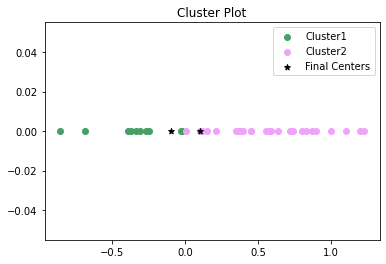

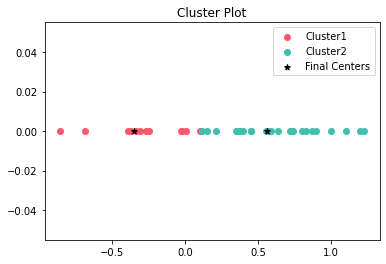

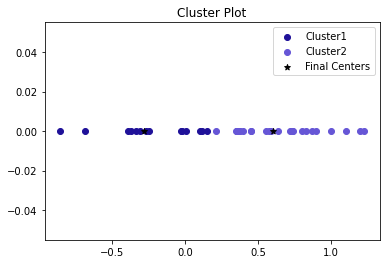

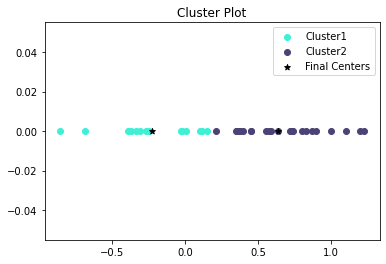

====================== Question 2 -> a) -> ii) ======================


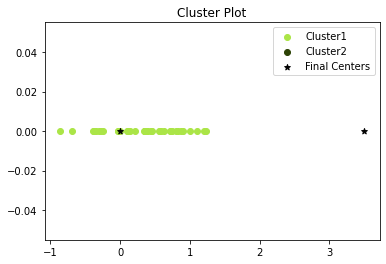

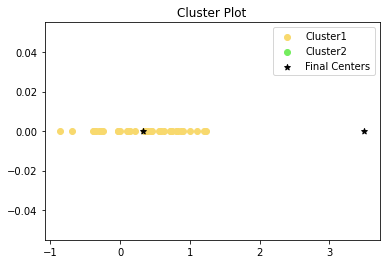

In [275]:
# Q2 - a)

count = 20  # number of points to sample
d1 = np.random.uniform(-1, 1, count)        # Sampling from uniform [-1, 1]
d2 = np.random.uniform(-0.5, 1.5, count)    # Sampling from uniform [-0.5, 1.5]
dataSet2 = [*d1, *d2]    # The final combined dataset

# i)
print("==========================================================================")
print("======================", "Question 2 -> a) -> i)", "======================")
print("==========================================================================")
centroids = [-0.1, 0.1]      # The initial centroids given
[clusterCentroids, clusterLabel, sse] = kMeans(dataSet2, 2, centroids, [True, 1, []])    # Running k-means for plotting as mentioned in question

# ii)
print("===========================================================================")
print("======================", "Question 2 -> a) -> ii)", "======================")
print("===========================================================================")
centroids = [0, 3.5]      # The initial centroids given
[clusterCentroids, clusterLabel, sse] = kMeans(dataSet2, 2, centroids, [True, 1, []])    # Running k-means for plotting as mentioned in question

In [276]:
# Q2 - b)

dataSet2.append(np.random.uniform(3, 4))     # Adding a random point generated uniform from [3, 4]

k = 2       # k value for k-means algorithm
count = 100  # Number of times k-means algorithm is performed
for i in range(count):
    centroids = getKRandomPoints(dataSet2, k)    # initial centroids
    print("===========================================================================")
    print("Initial Centroids:", centroids)
    [clusterCentroids, clusterLabel, sse] = kMeans(dataSet2, k, centroids)
    print("Final Centroids  :", clusterCentroids)
    print("===========================================================================")

# Observation:
# I observed that the final centroids obtained for differnt sets of initial centroids are not always equal
# They are equal for some sets of initial centroids but not always equal
#
# No the clusters are not always found correctly

Initial Centroids: [0.3543497003141234, 0.9989114207269485]
Final Centroids  : [0.09306892819016503, 1.102252773343881]
Initial Centroids: [0.3775606667091371, 0.8014810648808524]
Final Centroids  : [0.09306892819016503, 1.102252773343881]
Initial Centroids: [0.9989114207269485, 0.3527780859118226]
Final Centroids  : [1.102252773343881, 0.09306892819016503]
Initial Centroids: [0.7210961923067543, 0.9007038041324285]
Final Centroids  : [0.09306892819016503, 1.102252773343881]
Initial Centroids: [0.3775606667091371, 0.9007038041324285]
Final Centroids  : [0.09306892819016503, 1.102252773343881]
Initial Centroids: [1.2015245208083591, 0.4502707727493369]
Final Centroids  : [1.102252773343881, 0.09306892819016503]
Initial Centroids: [1.2015245208083591, -0.6918990365663875]
Final Centroids  : [0.7647900586316807, -0.19662169877524135]
Initial Centroids: [-0.3928733114278802, 0.3527780859118226]
Final Centroids  : [-0.19662169877524135, 0.7647900586316807]
Initial Centroids: [0.801481064880

In [277]:
# Function to generate (heigt, weight) samples from normal distribution
# Given mean height, standard deviation for heights, mean weight, standard deviation for weights, number of sample to generate
def generateHWSamples(hMean, hSd, wMean, wSd, number):
    heights = np.random.normal(hMean, hSd, number)  # Generating heights from normal distribution
    weights = np.random.normal(wMean, wSd, number)  # Generating weights from normal distribution
    result = []             # Final list of (height[i], weight[i])
    for i in range(number):
        result.append([heights[i], weights[i]])
    return result

DataSet: [[5.570418092256681, 62.06663850314381], [7.813053528388757, 64.57319755739746], [3.575892834697702, 58.263757455993385], [4.889388740988075, 49.49957984269273], [6.93143480075934, 58.792467310524316], [6.236130849736608, 59.50173421222249], [6.579390578111934, 73.01616117188944], [5.6850815945580075, 68.54549215343853], [5.483782288270459, 57.13501195131693], [5.730932839852805, 58.29948323682664], [4.253846143039378, 58.14052426930147], [4.306507929518905, 65.29711970898931], [6.529759385413461, 65.03450691449535], [7.3536757256989915, 73.53249696819931], [5.071307638339247, 67.61985089288405], [6.026551986757174, 67.63817679891866], [5.733627018274392, 63.01451698911191], [4.806038723245595, 50.673863360530625], [4.141925222848745, 62.33371951652302], [6.711008930264044, 64.02219257717887], [5.070952502564165, 57.90782435973583], [6.507302977131468, 62.617475852842674], [6.634236866185338, 66.62607880134792], [4.458772585394996, 61.98663962319646], [4.1493906501413775, 57.1

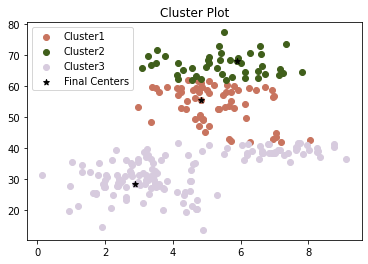

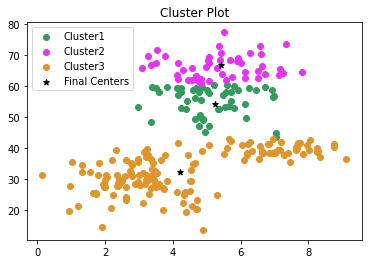

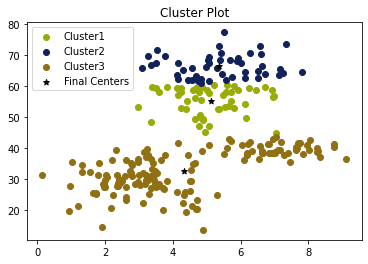

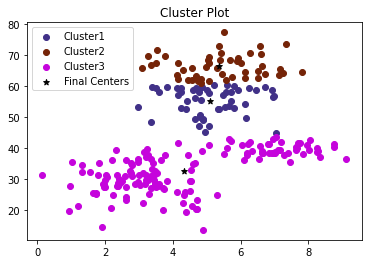

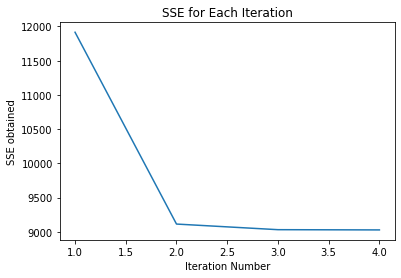

Final Centroids  : [[5.096320529491143, 55.410249057895754], [5.357882769079741, 66.49213080870352], [4.333878174121517, 32.82785864087259]]
Initial Centroids: [[8.775565562074188, 41.275890420913754], [7.167657986679883, 65.4353810333954], [7.100801493128665, 39.50030567478101]]


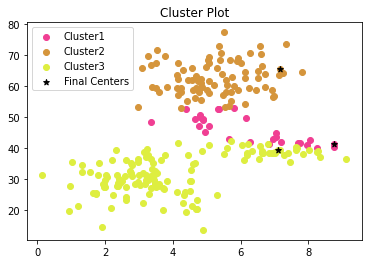

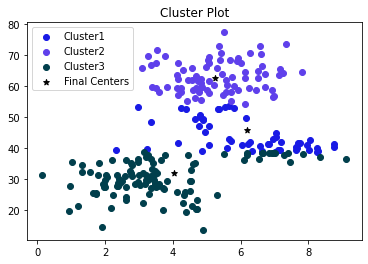

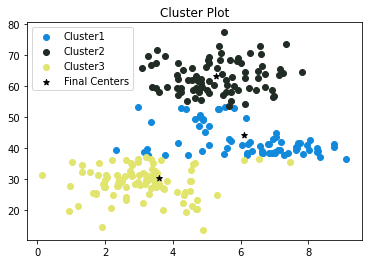

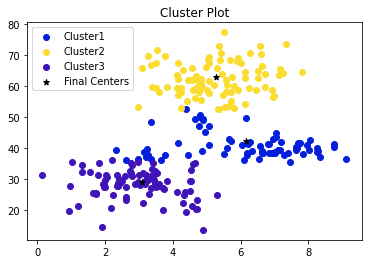

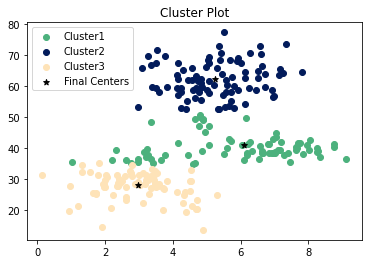

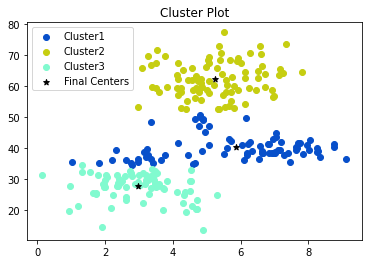

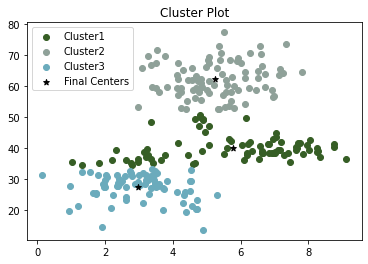

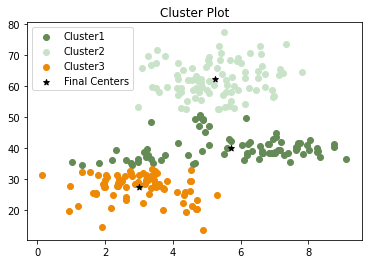

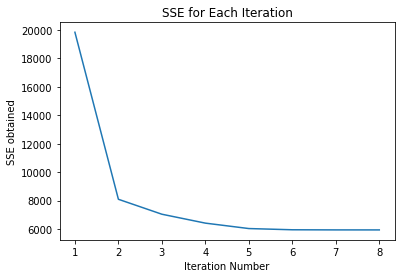

Final Centroids  : [[5.709736588913861, 40.0969162787357], [5.2443624088212255, 62.260008784764985], [3.0040773657160633, 27.443621636187668]]
Initial Centroids: [[3.1022982000298738, 65.91082401890014], [3.3544186333047055, 66.95093975269921], [2.886548468621676, 28.544743777823943]]


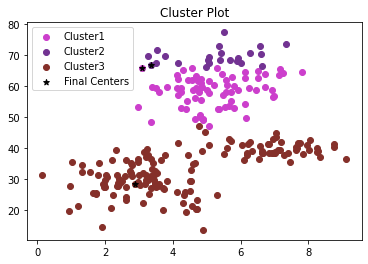

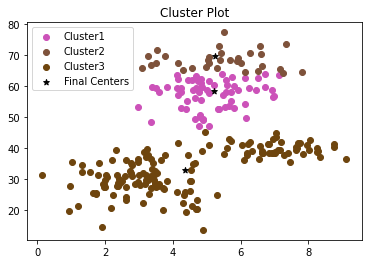

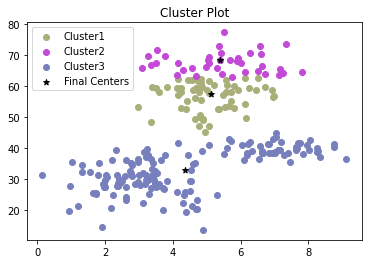

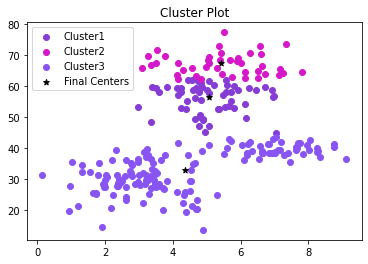

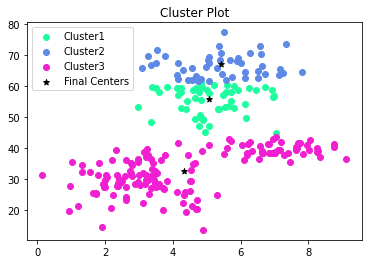

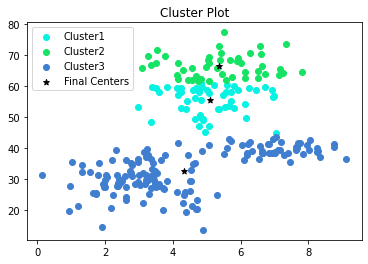

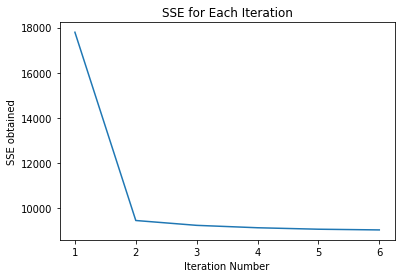

Final Centroids  : [[5.091279744962966, 55.51685194346143], [5.369132212049571, 66.60770376223174], [4.333878174121517, 32.82785864087259]]
Initial Centroids: [[4.110950722411724, 25.763355873536657], [5.6850815945580075, 68.54549215343853], [2.776368877665208, 35.16831392903369]]


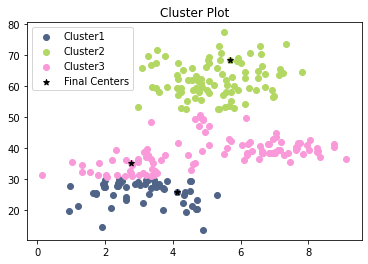

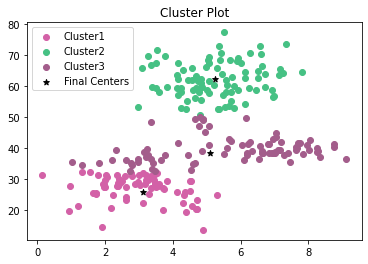

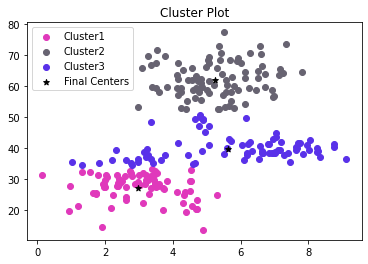

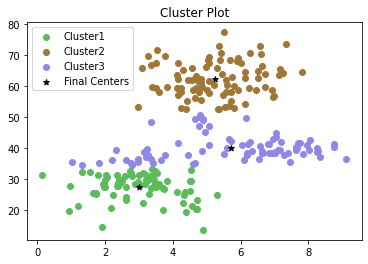

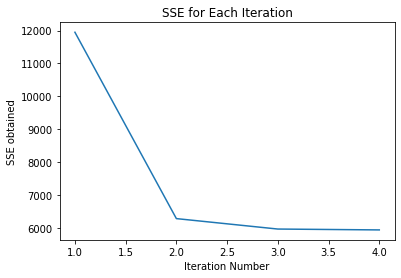

Final Centroids  : [[3.0040773657160633, 27.443621636187668], [5.2443624088212255, 62.260008784764985], [5.709736588913861, 40.0969162787357]]
Initial Centroids: [[6.191313774045003, 37.94889250707962], [3.7212990372350623, 27.358767235771797], [4.811635048629533, 50.02036677899028]]


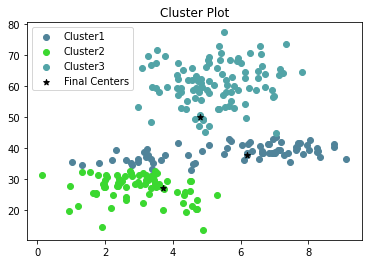

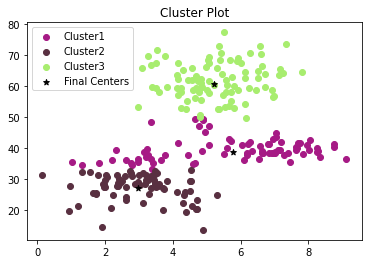

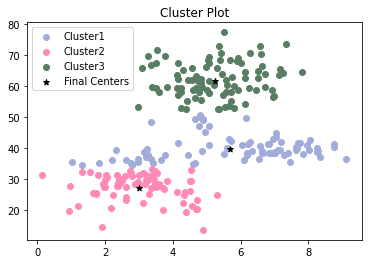

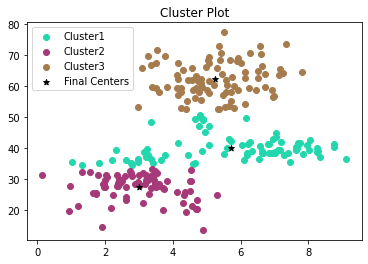

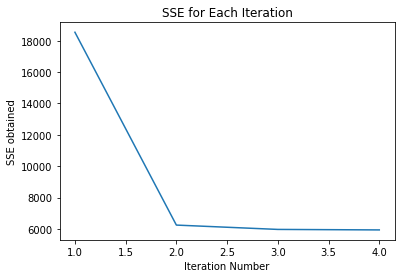

Final Centroids  : [[5.709736588913861, 40.0969162787357], [3.0040773657160633, 27.443621636187668], [5.2443624088212255, 62.260008784764985]]


In [278]:
# Q3
# Q3 -> a)

kidSample = generateHWSamples(5, 1.1, 60, 7, 100)   # Sample of kids' features
adultSample = generateHWSamples(3, 1, 30, 5, 100)   # Sample of adults' features
alienSample = generateHWSamples(7, 1, 40, 2, 50)    # Sample of aliens' features
dataSet3 = [*kidSample, *adultSample, *alienSample]  # Combined dataset

print("===========================================================================")
print("DataSet:", dataSet3)

k = 3       # k value for k-means algorithm
count = 5  # Number of times k-means algorithm is performed

for i in range(count):
    centroids = getKRandomPoints(dataSet3, k)
    print("===========================================================================")
    print("Initial Centroids:", centroids)

    [clusterCentroids, clusterLabel, sse] = kMeans(dataSet3, k, centroids, [True, 2, []], True)
    print("Final Centroids  :", clusterCentroids)
    print("===========================================================================")

First set of Initial Centroids


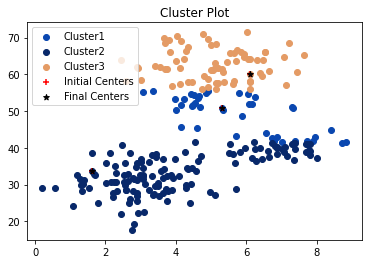

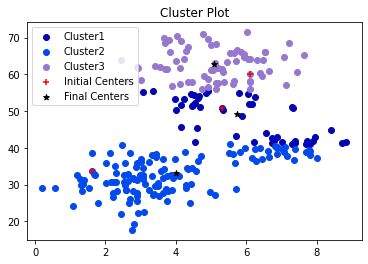

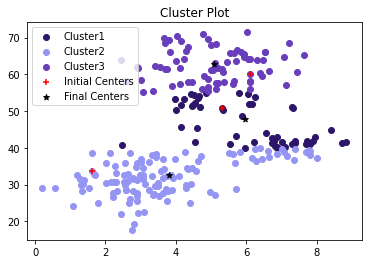

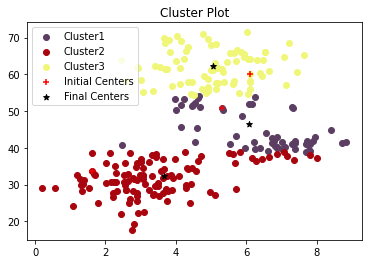

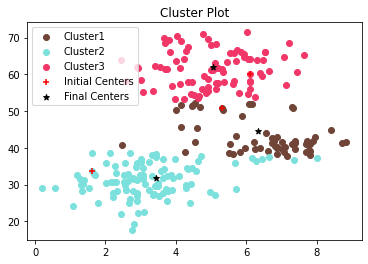

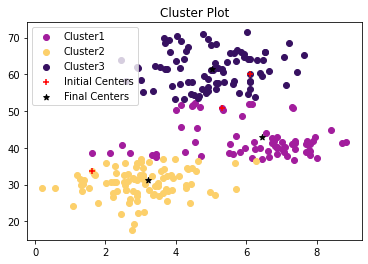

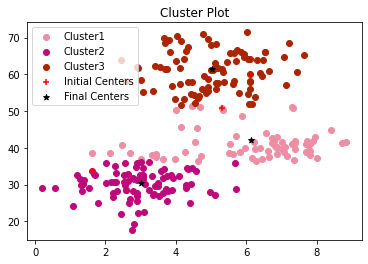

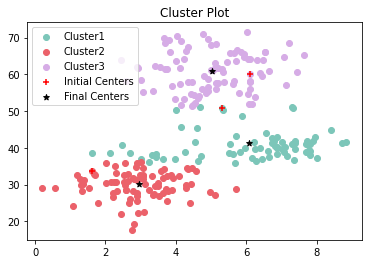

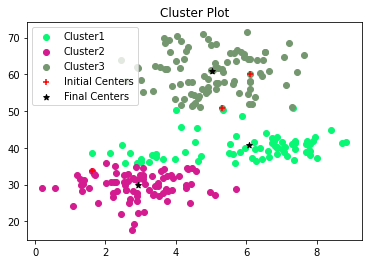

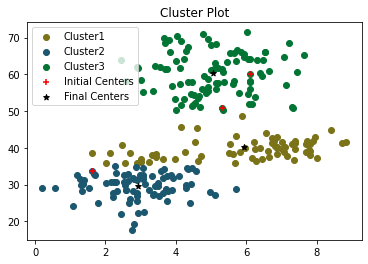

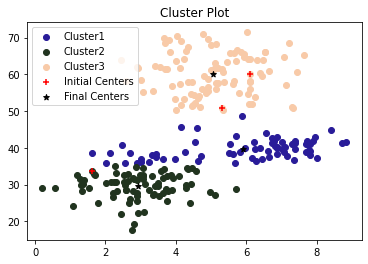

Second set of Initial Centroids


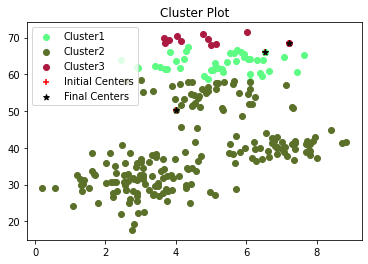

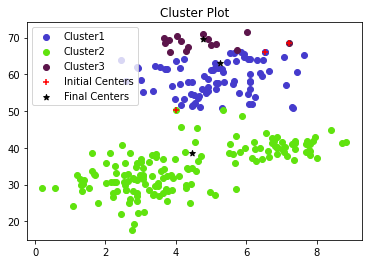

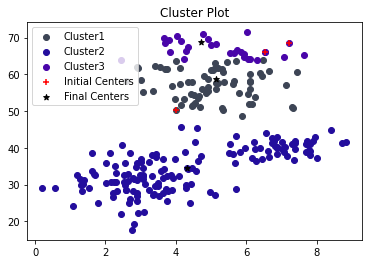

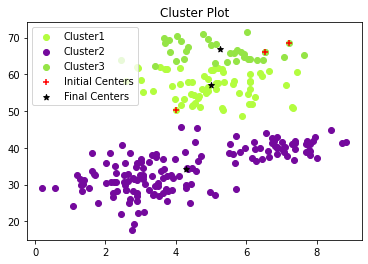

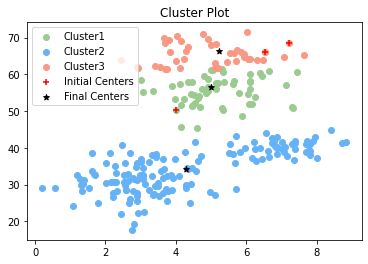

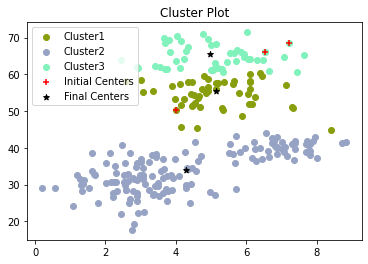

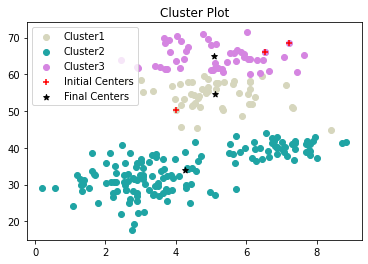

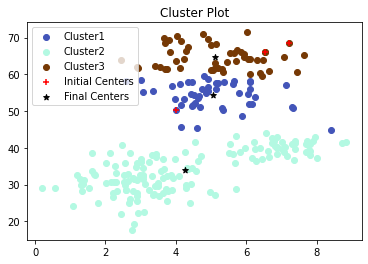

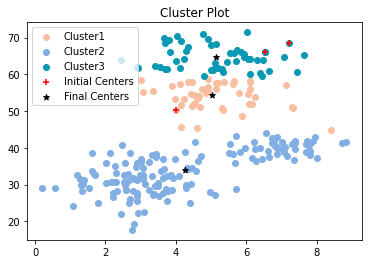

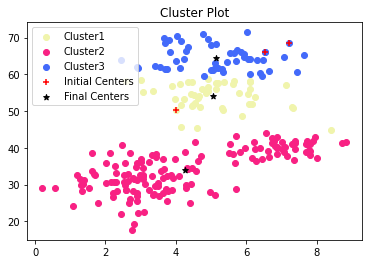

In [279]:
# Q3 -> b)

# Yes, I was able to obtain different sets of final clusters when starting with different initial centroids

# Example: The below dataSet was randomly generated
exDataSet = [[5.856393413138581, 66.13556184926054], [4.145967212468322, 51.76814995632157], [3.755874798847123, 61.577933313123495], [4.031515517114419, 70.5182026314614], [7.65097770921828, 65.261780901554], [4.845915419637708, 54.9907171157347], [3.6884222755259812, 68.55754376799418], [5.35026246521336, 50.389042104263936], [4.903923321712983, 55.524110822602964], [4.5357078816972, 52.08629319240177], [5.303786816608553, 50.935490257694006], [3.883530958423137, 56.94667461937464], [5.748576345830683, 66.59028072795017], [5.647748180577314, 65.78095499727654], [4.00545398545033, 50.416810265638915], [5.144006850862212, 57.68394351154399], [5.9443389106678595, 64.70783800224149], [5.120597667139129, 61.800099764612575], [6.1195868792880965, 64.20829640309594], [6.113212842026551, 59.97697342896343], [5.867478648883151, 48.730833986562004], [5.321012994677025, 61.39659819418247], [7.332561053016263, 50.845347035597236], [7.142102693930645, 57.20325229855623], [7.085919998074555, 64.82196452131639], [6.239068790988448, 53.88504229937043], [4.91618069679951, 56.60711801195526], [4.220338657542328, 53.414032734769194], [4.776304745200639, 71.01977913954426], [3.0102416920491493, 58.46156688551896], [5.698258940231421, 63.65607357970196], [6.48030114077666, 63.7686037437088], [4.9152782843189256, 58.660407995983334], [5.20045579949555, 61.828400399877914], [6.104188639890415, 58.02123941022636], [5.129771817778609, 56.07447494216857], [6.110202079003552, 58.157898511309455], [5.645174120727851, 58.13081474117424], [6.461527026575097, 59.671307690712815], [3.6574223905017207, 69.76486506881255], [4.451096515121716, 51.48596047148091], [4.2204965266388115, 64.12268784461685], [3.8287948856751806, 66.2042483625701], [4.661625734256741, 54.08160718783298], [2.9133953329404014, 61.804930279765614], [5.53707729305312, 65.6714209524905], [2.8941066194344187, 61.90792313313921], [3.978401494682381, 53.38021082793324], [6.3093060661693885, 64.01530508677027], [5.370947038070803, 57.93885462708356], [4.913665524342034, 69.68173047306911], [4.4471931364191075, 57.84424007837518], [5.936649852146966, 65.40572526525945], [4.354495563254462, 67.46569615852653], [4.498334613971333, 51.635192976880155], [4.795182271395375, 59.52447461282638], [3.403664984894428, 62.32056286353526], [5.809505861236479, 54.84808833126847], [4.1322377408914335, 57.4668765035443], [4.346855779765543, 57.821132039950186], [4.990136392509473, 61.05578652944511], [6.074452269820961, 51.965933375252234], [4.014866251019179, 63.59032325837836], [5.195857178105144, 57.739559385406096], [4.1443434158450145, 69.05776810313321], [4.636834304220655, 53.57470625450816], [6.391821810621008, 60.34363465372701], [4.433305924190036, 54.64937369401494], [5.00590010577375, 68.07658215287245], [4.610997174948964, 45.477742070264895], [7.303050166442263, 51.160035185470164], [6.530949433695629, 66.12087928666823], [3.0578624115475996, 55.220143141326986], [4.1209507017363, 61.67402207178348], [5.1059922451417155, 63.19017949595738], [3.3440684909720453, 55.50103830183275], [6.119389974647665, 56.139141246966545], [7.210690998689389, 68.54396497361431], [6.538463360336705, 66.12553127787764], [6.636686613259089, 60.861335025619006], [6.041930984726301, 64.2720275917753], [4.687285224921522, 51.0399822964155], [3.6860502723111894, 61.567384165141114], [4.748705806789645, 56.03667950893116], [5.152311082497756, 68.34359011286226], [5.330515082510755, 60.55576153417019], [5.6373742035970364, 57.429467199964684], [6.02226974517954, 71.45176624644768], [5.465471391147466, 63.438327302276434], [2.4426955399001717, 63.78626910521039], [6.176204901978128, 52.06383580530472], [4.508806430044365, 54.39400925813613], [4.156218993903051, 45.645287688176595], [3.5585243644919977, 61.89628067329083], [5.0537899863987255, 61.11638031306668], [7.437740353517837, 60.6816455509504], [4.300155605513393, 66.21881336822155], [2.5739878177630953, 58.28747573187781], [6.038033588494312, 54.739565989273146], [3.7991646322340036, 69.36560650770667], [3.8516532025461663, 32.638316000140456], [2.7859831220950504, 31.930349537994918], [3.0951823666995013, 22.597324163285336], [2.0071258389428657, 30.375117037293045], [2.636860920327252, 30.92930582989361], [1.6304565716031845, 38.518966530363414], [2.9122959562879838, 22.385074080382303], [2.813618917717669, 31.492119530095614], [1.5426399506912818, 28.959747464504797], [1.3102695677312217, 29.83636653624137], [4.9600296391108, 28.052193695076465], [3.250750747709009, 36.214925249200846], [2.022445186009029, 35.80803380884442], [2.9092071797251084, 31.320858498584208], [1.7824364357315052, 24.97276506274312], [3.625168953706136, 27.76429433005095], [3.0557165267116506, 34.57319109686697], [3.2379234617251385, 28.4185122343521], [4.58150189552965, 33.62312192545505], [2.5396882157829417, 32.4985039038468], [3.0034075425720186, 36.0243472209194], [5.104439787291133, 27.05667278769486], [2.5665430636708075, 35.97755301447227], [1.0660159836056629, 24.088795472817626], [4.275607349590154, 29.917902242036572], [3.110475967239579, 30.172085128334167], [2.2160267224422094, 26.62419146966846], [3.0222715352915523, 37.08102004431916], [5.695373794745028, 35.92404050852076], [3.5074631820217865, 26.91631331438253], [3.62741492946731, 37.0683572421644], [3.331722583262224, 32.37464418836541], [2.6759911011358044, 24.880208278639216], [1.6813027463430572, 32.94744432532662], [3.6768682812770863, 34.15517301230587], [1.2017044724269885, 32.70506015101414], [2.702213791764525, 38.511283448889365], [2.5712326208687797, 28.6262244971132], [2.5844923782205718, 28.666440591419352], [1.2770174902204128, 31.450822384267127], [4.3240281760451875, 34.616508043209876], [0.5532853260899206, 29.047242051385453], [3.6325591939465713, 31.799292854396608], [3.929390905616224, 31.877778107004563], [3.8846519033246985, 28.568246389532558], [3.078855223625314, 32.37823796675172], [2.7670893245609522, 17.686935977019886], [2.5416418077722147, 29.993776983590397], [2.8136113604745967, 19.394009471657043], [2.2304136179867142, 30.598013526719484], [3.7429188685595642, 32.40725622502708], [4.28092166386599, 29.009119997878273], [2.9718973402819393, 32.51865015782734], [2.13009224829641, 38.561556946753456], [3.0662941021822987, 31.48920088794357], [0.19652872405930255, 29.017850809236375], [3.5668565399855092, 33.73822920381098], [3.3630597094950883, 27.0747825570268], [3.4303545655779826, 38.43714110509684], [3.9739283932714193, 36.97702496736599], [3.5042291976993676, 30.527578820200258], [5.718695880473643, 28.776475778943475], [3.373728518770597, 27.590029482956705], [4.467516850751252, 34.58671924232915], [2.448127409364075, 21.978607173384077], [4.253122621836843, 38.79219937949684], [2.6860279100262745, 26.2171355049527], [2.908244805850588, 27.702937792485606], [2.7840372328123206, 28.32265677326109], [1.6033318045345024, 33.601152279142205], [2.27750083107939, 35.124684153924576], [4.3443884325797315, 34.12890387142597], [2.5376763554184913, 30.83267423341033], [3.4205288221849153, 29.65192709855399], [1.3281183921751738, 28.349970046572807], [3.073842429490131, 32.596103925658916], [3.775434908799005, 28.335748159667336], [2.6280782715790303, 32.8714164363014], [4.624492078595992, 36.305994993622875], [4.4258464437482425, 30.114554886695995], [3.7208424102837734, 28.87061506966833], [2.2865297969016356, 33.17457415119397], [2.1672648567361392, 30.66432919159531], [3.495976968342227, 29.744512749971054], [3.7578004016729443, 25.59680324957694], [2.2099054559835034, 27.722248404389248], [3.423766793429303, 37.6510327701002], [4.407185269034644, 25.016032413112107], [4.096058167147237, 32.476278087908405], [2.9065123390232848, 35.86120120120409], [3.326322275100231, 38.17359614071757], [2.898190720614238, 25.6098995587999], [1.3604721519586145, 30.278310095003974], [1.715479021777621, 32.49967290984881], [2.4789907783967142, 40.78210752141077], [2.305764163508523, 30.745425378530317], [2.897887971130855, 26.978828000563755], [2.870385627985605, 34.803111297717805], [1.385220090195864, 31.25321839034105], [2.3173339521425875, 28.25610280465889], [7.306356599140296, 41.15527282090596], [4.70156301926116, 37.6584089236225], [7.030717741256336, 41.70694028095497], [7.785731294995923, 39.31045523689916], [6.638625414500015, 37.43360491465219], [6.1626364395271604, 37.305006530183505], [7.110840080940934, 40.22598653445322], [6.455231110417318, 37.0204242144712], [5.614166806886589, 38.44760318316633], [7.948345983674944, 42.89136170536724], [5.508327875355967, 38.529351451685734], [6.736069780087446, 42.7229253677741], [6.871608730440444, 43.05186417490124], [7.345655573214065, 41.38863393844048], [7.818250697387597, 41.06002298125277], [6.380954931193166, 39.88619526864992], [7.827368091931988, 37.96657146434885], [7.900448172714022, 41.85094489821652], [7.389411865064961, 39.64634331857558], [6.722243014050491, 41.24639189870462], [7.0810043603115735, 38.78616896738774], [8.849134319607085, 41.55360199177972], [7.808502453067858, 39.27286952234794], [6.887745506380679, 40.08742657032064], [8.727272120112568, 41.39791082627366], [6.804132028310613, 41.737127368496616], [7.719189526347, 41.86492474353036], [7.155566077536262, 37.719602022728424], [8.4014907617665, 44.80539476963533], [7.386352613350848, 41.3371172478522], [5.699174508926035, 43.203926914005], [7.367356053590967, 36.74228271026565], [6.883178867559448, 40.10811726718374], [8.014469928019443, 37.123772530751516], [5.822107211652149, 38.933544219151564], [7.709021243701729, 40.949158424653845], [7.377965732562659, 41.757188305580286], [6.813273460474798, 40.56173315341783], [5.976959432940808, 40.084440254147246], [6.8649314634713825, 38.45994263667655], [4.544869469077439, 41.54329379880026], [6.221734237603095, 41.524441851472886], [6.5713952318724544, 43.91495177829246], [6.263655679046598, 39.80940390176567], [7.7063115928267845, 38.92576877472598], [6.614878620745769, 39.22427919034087], [6.271843931851546, 36.44334670641695], [7.7713543326249, 40.98702702854275], [7.011097922330497, 39.56508932843276], [5.527739639962819, 40.99234993529567]]

k = 3

print("===========================================================================")
print("First set of Initial Centroids")
print("===========================================================================")
# Initial Centroids 
ic1 = [[5.303786816608553, 50.935490257694006], [1.6033318045345024, 33.601152279142205], [6.113212842026551, 59.97697342896343]]
# Final Centroids obtained
# fc1 = [[5.912836839771393, 39.752743065999496], [2.9276746113125873, 29.62394521210922], [5.067647246494612, 60.176774830818495]]
[clusterCentroids, clusterLabel, sse] = kMeans(exDataSet, k, ic1, [True, 2, ic1])   # Displaying clusters

print("===========================================================================")
print("Second set of Initial Centroids")
print("===========================================================================")
# Initial Centroids 2
ic2 = [[6.538463360336705, 66.12553127787764], [4.00545398545033, 50.416810265638915], [7.210690998689389, 68.54396497361431]]
# Final Centroids obtained
# fc2 [[5.044818033866067, 54.19384988845572], [4.274124484375164, 34.00636917157235], [5.140503827620897, 64.53776646147463]]
[clusterCentroids, clusterLabel, sse] = kMeans(exDataSet, k, ic2, [True, 2, ic2])   # Displaying clusters

In [280]:
# Q3 -> c)

# To make a choice from among the different clusterings obtained, I will select the clustering
# which has minimal Sum of Squared Errors i.e. the clustering having minimum SSE as choosing that
# clustering will give minimum sum of distances from each point to its cluster centroid and thus
# reducing the final error value. There are total of nCk (combinatorics) combinations possible
# for different initial centroids. I will run k-means algorithm for all combinations and select
# the cluster with minimum value of SSE

In [281]:
# Q3 -> d)

# To modify the k-means algorithm such that different results are not obtained on successive runs over the same dataset,
# I should not choose the initial centroids randomly as it may lead to choosing two centers which are very close to each
# other. So, in order to implement it, I will choose first center at random and then choosing the next center, let say
# Ci where i E {2, 3, ..., k}, I will pick the point which has maximum distance from the nearest previously selected
# centroids, so the next center selected will be at maximum distance from previously selected centers.

In [282]:
# Function to generate k initial centroids as mentioned above: Q3 -> d)
def generateKCenters(dataSet, k):
    result = [] # resultant list of k centers selected

    firstC = dataSet[np.random.randint(0, len(dataSet))]    # Generating the first centroid randomly
    result.append(firstC)   # Adding the first centroid to result
    count = 1

    while(count < k):   # Selecting next k-1 centers
        distances = []  # Distances to keep store distances of data points from nearest centroids

        for point in dataSet:   # For each point in dataSet
            dist = findDist(point, result[0])   # Represents the minimum distance of this point from previously selected centers

            for c in result:    # Looping all the previously selected centers
                currDist = findDist(point, c)   # Finding distance b/w point and center
                if (currDist < dist):   # Updating minimum distance
                    dist = currDist

            distances.append([point, dist])     # Adding [point, minDist] to distances array

        distances.sort(reverse = True, key = lambda pair: pair[1])  # Sorting it in descending order based on distances of points
        result.append(distances[0][0])  # Selecting point with maximum distance as our next center
        count += 1  # Incrementing the count

    return result   # Returning the final result of K centers chosen

In [283]:
# Function to perform k-means algorithm with impovement mentioned as above: Q3 -> d)
def kMeansUpdated(dataSet, k, centroids = []):
    dataSet = convertToList(dataSet)    # Converting the given data of points to list

    if (len(centroids) == 0):           # if centroids are not provided initially
        centroids = generateKCenters(dataSet, k)    # Choosing k centers as mentioned above
    elif (k != len(centroids)):         # The value of k and number of centroids given should be equal
        print("==================================================================================================")
        print("========", "Error: Value of k should be equal to the number of initial centroids given", "========")
        print("==================================================================================================")
        return
    else:
        centroids = convertToList(centroids)    # converting centroids to list

    prevCentroids = centroids   # To keep track of prevCentroids
    nearestPointsMap = getNearestPoints(dataSet, prevCentroids) # Getting the clusters of points nearest to these centroids
    newCentroids = getNewCentroids(nearestPointsMap)    # Getting new centroids

    while(prevCentroids != newCentroids):   # while centroids don't converge
        prevCentroids = newCentroids        # updating prevCentroids
        nearestPointsMap = getNearestPoints(dataSet, prevCentroids) # Getting the clusters of points nearest to these centroids
        newCentroids = getNewCentroids(nearestPointsMap)            # Getting new centroids
    
    clusterCentroids = newCentroids # The final centroid obtained
    clusterLabel = {}   # Cluster label for each point in dataSet

    for i in range(len(clusterCentroids)):  # For each centroid obtained, giving cluster label to each point
        center = clusterCentroids[i]        # The centroid
        key1 = tuple(center) if isIterable(center) else center  # if center is not 1d, key will be tuple(center)

        for point in nearestPointsMap[key1]:            # For every nearest point of this center
            key2 = tuple(point) if isIterable(point) else point # if point is not 1d, key will be tuple(point)
            clusterLabel[key2] = i              # The cluster label for this point
    
    finalSSE = calculateSSE(clusterCentroids, nearestPointsMap) # Sum of Squared Errors finally obtained

    return [clusterCentroids, clusterLabel, finalSSE]    # Returning all values

# dataSet3d = [[-2.58, 0.661], [-3.195, 0.463], [1.437, -1.386], [1.01, -1], [-3.171, 0.789], [0.464, 0.187], [0.205, 0.204], [-3.76, 3.829], [-2.409, 1.907], [0.284, 0.07], [-3.04, 0.94], [-2.258, 2.448], [-2.929, 3.212], [-2.077, 2.14], [-2.651, 2.846], [-3.217, 3.551], [-2.777, -0.24], [-2.438, 0.482], [-2.909, 0.591], [-2.864, 3.241], [-3.805, 4.036], [-2.005, 1.677], [-2.989, 0.915], [-2.215, -0.33], [-3.459, 1.627], [-1.688, -1.532], [-3.769, 2.102], [-1.975, 1.874], [1.318, -1.421], [-2.095, -0.324], [-0.268, -0.072], [-2.289, -0.425], [-1.592, -1.379], [-3.838, 2.26], [-2.247, 1.834], [-3.154, 3.539], [-3.06, 3.251], [-3.98, 1.997], [1.167, -0.889], [-3.864, 4.628], [0.038, 1.054], [1.197, -1.288], [-3.545, 1.949], [-3.502, 1.86], [-3.282, 3.268], [-1.907, 1.825], [-3.245, 1.697], [-3.962, 1.905], [-2.558, 2.514], [-2.979, 2.744], [0.589, -0.593], [-3.302, 1.029], [0.914, -0.383], [-3.196, 3.008], [-3.427, 0.925], [-1.626, 1.02], [-3.908, 1.873], [-3.701, 1.71], [-1.363, 0.741], [-2.521, 2.067], [-2.109, 1.676], [-3.566, 4.03], [-0.718, 1.789], [-2.855, 3.428], [-2.957, 2.831], [-2.622, 2.42], [-2.979, 2.747], [0.58, 0.041], [-2.844, 0.053], [1.388, -1.779], [-2.706, 2.361], [1.82, -2.117], [2.273, -2.879], [-4.387, 2.369], [-2.594, 2.451], [-2.668, 2.273], [-2.529, 2.573], [-2.039, 1.83], [1.426, -1.72], [-1.855, 1.597], [-1.771, 1.308], [0.411, -0.142], [-2.998, 3.251], [-1.15, 1.072], [0.406, -0.272], [1.265, -1.47], [-3.332, 1.429], [-4.507, 2.571], [-2.273, 1.885], [1.252, -0.922], [-3.454, 3.29], [2.208, -2.35], [-3.567, 4.365], [-3.353, 0.807], [1.95, -2.491], [-2.631, 0.267], [-1.547, 1.587], [-0.942, 0.961], [-3.31, 1.175], [-2.741, 2.519], [-2.666, -0.128], [-1.807, 2.372], [0.684, -0.219], [-3.756, 1.332], [-2.606, 2.825], [-4.07, 1.866], [1.2, -1.124], [-2.875, 0.55], [-3.214, 3.846], [-2.348, -0.116], [-2.579, 2.85], [-3.419, 1.79], [-2.554, -0.184], [-3.909, 1.572], [0.533, 0.419], [-3.115, 3.443], [0.16, 0.881], [1.965, -2.639], [-2.562, 2.664], [-3.241, 3.1], [0.862, -1.207], [-2.714, 2.157], [-3.42, 1.361], [-2.964, 0.772], [0.372, -0.44], [-3.097, 0.813], [1.51, -1.418], [1.526, -0.978], [-2.091, -0.972], [1.762, -1.861], [0.808, -0.241], [-2.841, 3.065], [-3.132, 0.84], [-2.375, 2.574], [-2.172, 1.606], [-2.449, 2.519], [1.23, -1.116], [1.324, -1.5], [-3.436, 1.278], [1.41, -1.348], [2.081, -2.947], [-1.502, 1.249], [-3.476, 4.051], [-4.295, 4.376], [1.083, -0.955], [-1.761, -0.388], [-2.856, 0.158], [-3.801, 1.834], [0.405, 0.261], [0.252, -0.186], [-2.384, 0.112], [-2.284, 1.902], [2.459, -2.694], [1.992, -1.815], [1.77, -1.671], [-0.598, 1.231], [0.924, -0.734], [-3.437, 1.607], [1.062, -0.9], [0.213, -0.048], [0.187, 0.661], [0.615, -0.706], [-2.237, 0.389], [-3.725, 3.655], [1.702, -1.496], [0.943, -1.048], [1.763, -1.131], [0.24, 0.167], [-2.822, 3.262], [1.726, -1.435], [-2.316, 2.825], [-2.553, 2.38], [-3.571, 4.083], [1.467, -1.441], [-3.139, 3.236], [1.226, -0.966], [-3.049, 3.095], [1.327, -0.775], [-3.122, 1.099], [-1.03, 0.434], [-2.357, 2.436], [-2.299, 2.213], [-2.409, -0.218], [0.683, -0.3], [2.052, -2.249], [-2.778, 3.355], [1.687, -1.239], [-3.798, 1.984], [-2.197, -0.754], [0.862, -0.449], [-3.566, 1.217], [-4.655, 2.884], [-1.79, -1.548], [0.219, 0.327], [-2.087, -0.609], [-4.997, 3.264], [-2.298, 2.548], [0.846, -0.776], [-2.365, 2.289], [-0.769, 2.105], [-2.734, -0.139], [1.696, -1.987], [-3.225, 3.04], [1.083, -0.663], [-2.811, 0.493], [-3.536, 1.711], [-0.98, 0.837], [-3.492, 3.553], [-3.317, 0.886], [-3.667, 4.267], [-2.342, 0.043], [-2.16, 1.924], [-3.604, 4.134], [-2.649, 2.855], [-3.854, 1.761], [-4.209, 2.712], [-0.196, 0.523], [-2.451, 2.645], [-2.867, 2.64], [-2.988, 1.173], [-3.301, 1.57], [-3.484, 0.84], [-1.469, 0.916], [-1.786, 1.398], [0.286, -0.142], [-0.046, 0.744], [0.354, 0.717], [-2.263, 2.059], [1.238, -1.457], [-2.491, 0.492], [-2.967, 1.1], [-3.264, 0.973], [-0.01, 0.361], [1.51, -0.992], [-3.129, 3.207], [-4.27, 2.647], [-4.557, 2.681], [-2.519, 2.244], [2.795, -3.196], [-3.345, 1.159], [0.469, -0.196], [0.933, -0.785], [0.266, -0.007], [-3.504, 1.403], [0.814, -0.297], [-2.34, 2.095], [-2.504, 2.69], [0.741, -0.782], [0.189, 0.31], [-3.283, 3.299], [1.949, -1.88], [-3.133, 2.906], [-3.221, 3.059], [1.622, -1.815], [-2.172, -0.361], [1.328, -1.482], [0.885, -0.305], [-3.424, 3.737], [-4.378, 2.32], [-2.764, 2.735], [-3.272, 3.245], [-3.766, 1.885], [-2.318, 2.627], [0.421, 0.202], [-1.295, 1.053], [-1.957, 1.978], [0.197, -0.113], [-2.333, -0.417], [-2.841, 2.419], [-2.772, 2.801], [-3.194, 2.93], [-4.141, 2.066], [-3.007, 2.861], [-2.821, 3.06], [1.161, -1.178], [-2.519, -0.361], [-3.772, 1.812], [-2.316, -0.191], [-4.357, 2.236], [1.342, -1.711], [1.232, -0.909], [-2.433, -0.7], [1.047, -0.963], [-3.979, 1.912], [-2.519, 2.179], [-3.242, 3.414], [-3.285, 2.827], [-2.657, 2.41], [-2.97, 3.086], [-3.477, 1.513], [1.332, -1.825], [-1.758, -0.921], [1.905, -1.913], [-4.827, 3.272], [-2.128, 1.87], [1.665, -1.525], [1.428, -0.984], [-2.169, 2.511], [-3.211, 3.063], [-0.826, 2.137], [0.649, -0.217], [-2.01, 1.472], [-1.922, 1.839], [0.933, -0.386], [-3.387, 1.341], [-3.929, 2.355], [-2.731, 2.651], [0.772, -0.678], [-2.818, 0.601], [-2.134, 2.047], [1.716, -2.319], [-3.421, 1.793], [2.12, -1.967], [-2.611, 2.176], [-2.957, 1.151], [1.195, -0.457], [0.64, -0.232], [-1.795, 1.491], [-2.883, 0.505], [1.218, -1.403], [-3.638, 3.971], [-3.926, 4.218], [1.605, -1.829], [1.008, -0.784], [-3.376, 3.515], [1.954, -2.24], [-2.992, 3.302], [-3.099, 1.028], [-2.902, 0.375], [1.98, -1.726], [-2.473, 0.524], [1.721, -1.91], [-1.626, 1.431], [-3.047, 0.813], [0.447, -0.818], [-2.23, 2.11], [-3.582, 3.639], [-2.61, 0.384], [-2.744, 1.098], [-3.904, 3.818], [0.768, -0.578], [-3.342, 0.892], [-2.503, 2.163], [1.11, -0.746], [-3.62, 1.261], [-2.26, -0.629], [-4.666, 5.319], [-3.327, 1.017], [0.25, -0.031], [1.883, -1.076], [-0.062, 0.623], [0.632, -0.645], [-3.16, 0.803], [-4.428, 4.173], [-1.579, -1.233], [0.656, -0.026], [-3.299, 3.093], [0.692, -0.587], [-3.454, 4.008], [0.272, 0.019], [-2.319, 2.017], [-3.423, 1.378], [-3.8, 1.948], [-2.684, 0.607], [-3.732, 1.249], [-2.637, 0.876], [-3.079, 1.2], [-0.145, 0.798], [-2.03, 1.739], [-3.667, 1.921], [0.561, 0.211], [-3.597, 4.228], [-3.529, 1.5], [-2.42, -0.44], [-3.135, 0.485], [1.645, -1.762], [-3.389, 3.345], [-3.119, 1.105], [0.232, -0.319], [0.046, 0.721], [-1.713, 1.533], [0.729, -0.724], [1.87, -2.036], [0.668, -0.219], [-2.564, 2.809], [-3.767, 4.522], [-2.937, 0.986], [-0.59, 0.838], [0.033, 0.884], [1.153, -1.168], [-2.636, 2.788], [-4.836, 3.211], [-2.863, 2.837], [0.708, -0.449], [-4.062, 4.555], [1.713, -2.007], [0.108, 0.315], [-3.005, 0.489], [-2.995, 0.462], [1.042, -0.958], [2.108, -2.47], [-2.073, 1.057], [-2.332, 0.095], [-3.341, 1.283], [1.535, -1.304], [-3.476, 1.556], [-3.476, 1.694], [-2.801, 0.378], [-2.415, 2.565], [-2.394, 1.954], [-3.132, 3.375], [0.809, -0.333], [-1.886, -0.52], [1.479, -1.434], [-3.654, 3.87], [-3.553, 1.132], [-3.673, 2.011], [-1.951, 2.126], [-3.924, 2.27], [-2.239, 1.349], [0.695, -0.069], [-3.338, 1.276], [-2.744, 0.545], [1.008, -0.781], [-2.87, 0.836], [-3.36, 1.358], [-3.929, 4.181], [-3.327, 1.392], [-3.47, 3.531], [-3.35, 1.716], [-3.075, 3.057], [-2.176, -0.078], [-1.81, 1.505], [0.905, 0.28], [-2.362, 2.39], [-3.105, 3.058], [2.644, -2.724], [-2.903, 2.977], [-3.334, 3.44], [1.577, -1.451], [-4.645, 4.948], [-1.973, 2.34], [-2.247, -0.246], [-1.565, 1.148], [1.515, -1.4], [1.169, -0.715], [-2.074, 0.77], [-1.753, 1.728], [0.736, 0.398], [-3.97, 3.953], [-2.486, -0.046], [-4.116, 1.718], [-3.079, 3.554], [-3.316, 0.656], [-2.439, 2.484], [2.416, -2.728], [0.162, 0.316], [-4.099, 1.912], [-0.232, 0.523], [1.155, -1.261], [1.726, -1.515], [-2.312, 2.635], [-2.743, 2.46], [-2.266, 2.83], [-2.705, 2.567], [-4.049, 1.971], [-2.522, -0.582], [-1.999, 1.462], [0.83, -0.616], [-2.867, 0.251], [-2.852, 2.619], [0.669, -0.721], [-4.458, 3.024], [0.678, -0.503], [0.392, 0.066], [-2.536, 3.003], [-2.718, 2.796], [-3.572, 1.168], [-4.082, 2.002], [-3.335, 1.242], [-3.819, 4.54], [0.207, 0.606], [-2.511, 2.518], [-3.017, 0.363], [0.476, -0.263], [-3.086, 3.423], [1.826, -1.776], [-2.627, 2.818], [-3.56, 2.428], [0.741, 0.148], [-1.842, -0.448], [0.904, -0.492], [-2.435, -0.226], [1.167, -0.694], [-2.177, 2.064], [2.423, -2.369], [-3.053, 0.791], [-2.812, 2.755], [-2.848, 3.187], [-4.415, 2.868], [-3.866, 2.057], [0.38, -0.192], [0.921, -0.506], [-2.6, 2.918], [-3.104, 3.244], [-2.593, 2.769], [-3.375, 1.254], [-1.574, 1.439], [-3.215, 1.296], [0.966, -1.009], [1.437, -0.89], [-3.655, 3.553], [-3.728, 3.884], [1.623, -1.441], [2.034, -2.156], [1.448, -1.656], [0.903, -0.952], [-3.405, 1.205], [1.357, -1.687], [-1.313, 0.85], [0.624, -0.514], [-1.83, -0.766], [-4.451, 2.969], [-3.497, 1.508], [-2.642, 0.405], [-2.655, 0.517], [1.278, -0.789], [0.343, 0.046], [-4.392, 2.985], [-2.89, 0.464], [0.366, -0.328], [-3.355, 2.597], [-3.256, 3.127], [0.915, 0.068], [-2.923, 3.505], [-3.53, 3.668], [-4.282, 4.77], [0.457, -0.498], [1.188, -0.917], [0.956, -0.286], [-2.559, 0.067], [-2.968, 2.791], [-3.247, 0.885], [0.924, -0.948], [-3.737, 1.751], [0.668, -0.171], [0.996, -1.154], [-2.529, 0.257], [-1.878, 1.661], [0.917, -0.555], [-3.148, 3.891], [-3.977, 2.746], [-2.516, 0.453], [0.318, -0.002], [-1.722, 1.165], [-2.807, 0.455], [2.416, -2.774], [-2.747, 0.476], [1.029, -0.783], [0.665, 0.019], [0.876, -0.58], [1.459, -1.95], [1.522, -1.849], [1.582, -1.143], [-2.171, 2.037], [-2.827, 3.225], [-3.521, 3.895], [1.653, -1.872], [-3.883, 4.12], [-2.411, 1.382], [0.132, 0.202], [1.207, -0.962], [-2.114, 1.93], [-2.596, 0.156], [-2.405, 0.275], [-2.401, 2.507], [-2.351, 2.288], [-3.354, 1.247], [0.781, -0.866], [0.683, -0.241], [-3.793, 2.413], [-2.051, 1.893], [0.02, 0.666], [1.238, -0.576], [-2.696, 2.999], [-2.859, 3.015], [-3.701, 4.528], [0.383, -0.204], [-2.904, 0.515], [-2.513, 2.371], [0.53, -0.467], [2.077, -1.706], [-2.552, 0.127], [1.508, -1.608], [-2.498, 2.525], [-2.496, 0.525], [-4.005, 4.633], [-1.619, -1.289], [0.139, 0.621], [1.095, -1.339], [-3.386, 1.534], [-3.477, 1.699], [-3.013, 1.41], [-3.043, 2.765], [-0.286, 0.848], [-2.569, 2.77], [1.963, -2.232], [1.173, -0.942], [-2.913, 3.171], [1.115, -0.623], [-2.591, 0.405], [-2.685, 2.476], [-2.247, 2.247], [-3.315, 1.436], [1.618, -1.837], [-2.697, 0.108], [1.376, -1.225], [-3.136, 3.012], [-0.024, 0.255], [-3.32, 1.063], [-3.983, 4.187], [-1.785, -0.286], [-3.321, 0.829], [-3.278, 3.108], [1.48, -1.289], [-2.777, 2.424], [0.019, -0.036], [1.507, -1.361], [1.966, -2.331], [-2.058, -0.465], [0.452, 0.036], [-2.02, 1.735], [0.878, -0.508], [-2.048, -0.738], [-2.619, 2.596], [-3.284, 3.599], [-3.297, 1.415], [-1.958, -1.142], [2.229, -2.122], [-3.227, 0.727], [-1.314, 1.037], [1.125, -0.975], [-2.455, 0.386], [1.351, -1.547], [-3.577, 1.678], [0.833, -0.124], [-4.398, 2.348], [-3.065, 0.911], [1.573, -1.601], [-0.905, 0.512], [-3.432, 3.232], [1.793, -1.328], [0.895, -0.614], [0.581, 0.012], [-1.122, 0.473], [0.403, -0.415], [-3.432, 1.688], [-2.457, 0.148], [-3.701, 1.104], [-2.019, -0.607], [1.555, -1.241], [-3.376, 3.632], [1.036, -0.392], [1.261, -1.222], [-2.979, 3.108], [-0.409, 1.337], [-3.606, 3.296], [-3.032, 3.184], [-0.071, 0.647], [-2.693, 2.052], [-1.983, 1.52], [-2.343, 2.071], [-2.505, -0.039], [-1.98, 1.472], [-1.685, 1.077], [1.274, -1.421], [1.309, -0.899], [0.878, -0.824], [-2.683, 0.131], [0.945, -1.156], [-3.3, 0.93], [-2.79, 0.797], [-2.721, 2.502], [-2.067, 0.437], [-3.656, 1.961], [-2.285, 2.415], [-2.505, 2.259], [-4.811, 3.038], [2.016, -2.028], [-1.846, -0.016], [-0.091, 0.495], [-4.115, 2.32], [1.095, -1.523], [0.127, -0.068], [1.56, -1.228], [1.496, -1.108], [1.261, -1.405], [-5.241, 3.576], [1.601, -1.498], [0.661, -0.225], [-2.684, 0.088], [-1.953, -0.823], [-2.24, 1.79], [-3.404, 1.569], [0.545, -0.124], [-3.255, 3.533], [0.695, -0.462], [-3.265, 3.362], [-2.723, 0.294], [-2.495, 0.486], [-3.486, 0.464], [1.503, -1.89], [-3.209, 1.288], [-1.997, 2.268], [0.362, -0.106], [-2.743, 0.303], [-2.48, 0.36], [-4.468, 2.449], [-3.765, 1.271], [-2.871, 0.621], [-1.856, 1.51], [-1.863, 1.577], [-4.424, 2.757], [-3.125, 1.207], [-2.82, 3.133], [-3.153, 1.432], [-2.345, 2.292], [1.404, -1.055], [-4.052, 2.369], [-2.016, 1.825], [-1.661, 0.969], [-0.102, 0.858], [-0.266, 1.277], [0.15, 0.742], [-3.332, 1.691], [-3.22, 0.925], [0.497, -0.181], [-3.713, 3.865], [-3.548, 3.378], [1.46, -0.795], [-2.939, 3.2], [0.82, -0.558], [-2.816, 0.315], [-3.467, 3.955], [1.025, -1.276], [-3.357, 1.348], [-2.227, 2.25], [-2.793, 1.198], [-3.566, 1.402], [-2.237, 0.293], [1.583, -1.449], [0.561, -0.386], [-2.697, 3.138], [-1.54, 1.125], [-2.887, 0.667], [0.924, -0.853], [-2.626, 0.318], [-1.731, 1.296], [-3.574, 1.801], [-3.363, 1.08], [-3.592, 1.801], [-2.652, 2.406], [-2.719, 0.301], [-3.858, 1.684], [0.092, -0.019], [1.467, -1.505], [1.929, -2.222], [-3.178, 3.593], [1.414, -1.462], [0.308, -0.39], [-2.961, 3.385], [-2.571, 0.227], [-3.558, 3.493], [-2.337, 2.644], [-0.003, 0.332], [-3.149, 3.444], [1.726, -1.545], [-3.946, 1.242], [0.981, -1.278], [-0.11, 0.022], [-3.311, 0.528], [-1.857, 1.671], [-3.51, 0.9], [0.775, -0.862], [-3.172, 3.215], [-4.231, 1.553], [-3.681, 1.573], [1.136, -0.966], [-3.865, 3.966], [-3.09, 0.791], [-3.109, 1.138], [1.164, -0.803], [-4.065, 1.831], [0.362, -0.072], [0.984, -0.784], [-3.361, 3.607], [-1.503, 1.287], [1.898, -2.019], [-2.502, 0.586], [2.118, -1.995], [0.941, -0.65], [-2.225, 2.563], [-2.555, 0.634], [1.476, -0.572], [-3.02, 0.958], [0.746, -0.285], [-2.195, 2.199], [-3.554, 0.937], [-3.488, 4.276], [-2.416, 1.906], [2.011, -2.152], [2.578, -2.885], [-2.501, 1.792], [-2.995, 1.151], [-1.521, 1.002], [-3.651, 4.648], [-1.933, 1.563], [-2.811, 2.9], [0.924, -0.858], [-4.975, 3.341], [-2.018, -0.36], [2.017, -2.327], [0.943, -1.391], [-3.722, 3.887], [-3.035, 0.683], [2.375, -3.072], [-3.341, 0.942], [-1.925, 1.872], [-4.029, 2.321], [-2.536, 2.117], [-2.233, 2.187], [-2.864, 0.494], [-2.602, -0.164], [-3.204, 3.193], [-0.216, 0.634], [1.625, -1.792], [-2.25, -0.378], [-2.817, 2.886], [-4.339, 2.944], [-3.355, 1.556], [-3.192, 3.136], [-3.174, 3.316], [1.219, -1.403], [-1.895, 1.769], [-2.926, 0.64], [-3.691, 1.852], [1.899, -1.957], [-3.225, 0.615], [-3.786, 1.652], [-2.032, 1.577], [-3.679, 1.744], [0.331, 0.274], [-1.547, 1.216], [0.411, 0.235], [-3.154, 1.17], [-3.452, 1.78], [-3.168, 3.367], [-3.573, 2.019], [-2.138, 2.233], [-2.737, 2.513], [1.337, -1.681], [-3.078, 0.381], [1.786, -1.457], [-3.273, 3.239], [-3.612, 2.107], [-2.649, 0.883], [1.684, -1.776], [-2.157, 2.313], [1.169, -1.128], [-3.031, 0.379], [0.921, -1.195], [-2.759, 2.478], [-3.333, 1.285], [-3.181, 0.98], [0.832, -1.073], [-2.926, 0.797], [-3.362, 2.149], [1.762, -1.379], [-4.31, 2.735], [-2.76, 2.524], [-2.751, 0.471], [-2.367, 2.007], [-4.472, 2.337], [-2.806, 2.517], [-3.391, 3.246], [-3.207, 1.162], [-1.814, -0.493], [1.369, -1.686], [-1.085, 1.762], [0.067, 0.642], [-3.928, 4.533], [0.354, 0.298], [-2.219, 2.188], [-2.314, 2.555], [-2.807, 0.708], [1.168, -0.773], [-3.072, 0.71], [1.038, -0.643], [0.657, -0.397], [-3.359, 3.053], [-2.295, 0.049], [-3.688, 1.36], [-3.132, 2.613], [-4.867, 3.181], [-1.853, 1.504], [-2.474, 2.046], [-2.839, 0.391], [-3.102, 3.174], [-2.969, 2.939], [1.644, -2.259], [-3.831, 4.345], [-3.449, 3.797], [-3.413, 0.98], [-3.666, 1.598], [-2.426, -0.265], [-1.919, 1.528], [-2.966, 0.549], [-4.702, 3.185], [0.936, -0.659], [1.522, -1.991], [-2.69, 0.678], [0.974, -0.874], [-3.574, 3.214], [-1.533, -0.969], [-3.052, 3.657], [-3.879, 2.122], [-2.618, 0.234], [-2.087, -0.714], [1.552, -1.687], [0.733, -0.616], [0.458, -0.47], [-2.807, 2.628], [0.433, -0.231], [-2.547, 0.237], [2.206, -2.888], [-4.125, 1.59], [-3.312, 3.088], [1.017, -0.806], [-1.938, -0.741], [-3.646, 3.453], [-3.474, 3.696], [-3.805, 4.619], [0.704, -0.329], [0.767, -0.623], [-3.048, 3.165], [-2.415, 0.278], [-4.334, 4.785], [-2.732, 0.256], [-2.557, 0.102], [-1.907, 2.057], [-4.206, 2.413], [-4.733, 2.831], [-2.543, 2.607], [1.096, -0.55], [-3.039, 0.394], [-2.584, -0.081], [0.673, -0.488], [0.34, 0.019], [-0.049, 0.372], [-1.707, -0.76], [-3.251, 3.908], [1.495, -1.611], [-2.884, 2.225], [0.855, -0.704], [2.403, -2.599], [-3.189, 1.149], [-0.351, 0.913], [-4.672, 3.162], [-2.924, 2.673], [-2.883, 2.594], [-4.01, 4.599], [-5.701, 4.472], [-3.309, 3.848], [-3.847, 3.755], [-3.897, 1.971], [-3.19, 3.787], [-3.118, 0.551], [1.43, -1.541], [-2.599, 0.021], [1.202, -1.197], [-1.62, 1.364], [0.747, -0.438], [1.503, -1.486], [-3.358, 0.836], [-4.296, 2.733], [-3.094, 1.179], [-2.806, 0.902], [-3.546, 1.289], [-3.867, 1.679], [-2.116, 1.785], [-3.078, 3.2], [-3.562, 0.92], [1.35, -0.456], [0.111, 0.466], [-2.913, 3.066], [-3.564, 0.917], [-2.78, 2.327], [-2.706, 2.652], [-2.763, 2.755], [-0.508, 1.537]]
# [clusterCentroids, clusterLabel, sse] = kMeansUpdated(dataSet3d, 6)
# print(clusterCentroids)

In [284]:
# Q4

dataSet4 = [[-2.58, 0.661], [-3.195, 0.463], [1.437, -1.386], [1.01, -1], [-3.171, 0.789], [0.464, 0.187], [0.205, 0.204], [-3.76, 3.829], [-2.409, 1.907], [0.284, 0.07], [-3.04, 0.94], [-2.258, 2.448], [-2.929, 3.212], [-2.077, 2.14], [-2.651, 2.846], [-3.217, 3.551], [-2.777, -0.24], [-2.438, 0.482], [-2.909, 0.591], [-2.864, 3.241], [-3.805, 4.036], [-2.005, 1.677], [-2.989, 0.915], [-2.215, -0.33], [-3.459, 1.627], [-1.688, -1.532], [-3.769, 2.102], [-1.975, 1.874], [1.318, -1.421], [-2.095, -0.324], [-0.268, -0.072], [-2.289, -0.425], [-1.592, -1.379], [-3.838, 2.26], [-2.247, 1.834], [-3.154, 3.539], [-3.06, 3.251], [-3.98, 1.997], [1.167, -0.889], [-3.864, 4.628], [0.038, 1.054], [1.197, -1.288], [-3.545, 1.949], [-3.502, 1.86], [-3.282, 3.268], [-1.907, 1.825], [-3.245, 1.697], [-3.962, 1.905], [-2.558, 2.514], [-2.979, 2.744], [0.589, -0.593], [-3.302, 1.029], [0.914, -0.383], [-3.196, 3.008], [-3.427, 0.925], [-1.626, 1.02], [-3.908, 1.873], [-3.701, 1.71], [-1.363, 0.741], [-2.521, 2.067], [-2.109, 1.676], [-3.566, 4.03], [-0.718, 1.789], [-2.855, 3.428], [-2.957, 2.831], [-2.622, 2.42], [-2.979, 2.747], [0.58, 0.041], [-2.844, 0.053], [1.388, -1.779], [-2.706, 2.361], [1.82, -2.117], [2.273, -2.879], [-4.387, 2.369], [-2.594, 2.451], [-2.668, 2.273], [-2.529, 2.573], [-2.039, 1.83], [1.426, -1.72], [-1.855, 1.597], [-1.771, 1.308], [0.411, -0.142], [-2.998, 3.251], [-1.15, 1.072], [0.406, -0.272], [1.265, -1.47], [-3.332, 1.429], [-4.507, 2.571], [-2.273, 1.885], [1.252, -0.922], [-3.454, 3.29], [2.208, -2.35], [-3.567, 4.365], [-3.353, 0.807], [1.95, -2.491], [-2.631, 0.267], [-1.547, 1.587], [-0.942, 0.961], [-3.31, 1.175], [-2.741, 2.519], [-2.666, -0.128], [-1.807, 2.372], [0.684, -0.219], [-3.756, 1.332], [-2.606, 2.825], [-4.07, 1.866], [1.2, -1.124], [-2.875, 0.55], [-3.214, 3.846], [-2.348, -0.116], [-2.579, 2.85], [-3.419, 1.79], [-2.554, -0.184], [-3.909, 1.572], [0.533, 0.419], [-3.115, 3.443], [0.16, 0.881], [1.965, -2.639], [-2.562, 2.664], [-3.241, 3.1], [0.862, -1.207], [-2.714, 2.157], [-3.42, 1.361], [-2.964, 0.772], [0.372, -0.44], [-3.097, 0.813], [1.51, -1.418], [1.526, -0.978], [-2.091, -0.972], [1.762, -1.861], [0.808, -0.241], [-2.841, 3.065], [-3.132, 0.84], [-2.375, 2.574], [-2.172, 1.606], [-2.449, 2.519], [1.23, -1.116], [1.324, -1.5], [-3.436, 1.278], [1.41, -1.348], [2.081, -2.947], [-1.502, 1.249], [-3.476, 4.051], [-4.295, 4.376], [1.083, -0.955], [-1.761, -0.388], [-2.856, 0.158], [-3.801, 1.834], [0.405, 0.261], [0.252, -0.186], [-2.384, 0.112], [-2.284, 1.902], [2.459, -2.694], [1.992, -1.815], [1.77, -1.671], [-0.598, 1.231], [0.924, -0.734], [-3.437, 1.607], [1.062, -0.9], [0.213, -0.048], [0.187, 0.661], [0.615, -0.706], [-2.237, 0.389], [-3.725, 3.655], [1.702, -1.496], [0.943, -1.048], [1.763, -1.131], [0.24, 0.167], [-2.822, 3.262], [1.726, -1.435], [-2.316, 2.825], [-2.553, 2.38], [-3.571, 4.083], [1.467, -1.441], [-3.139, 3.236], [1.226, -0.966], [-3.049, 3.095], [1.327, -0.775], [-3.122, 1.099], [-1.03, 0.434], [-2.357, 2.436], [-2.299, 2.213], [-2.409, -0.218], [0.683, -0.3], [2.052, -2.249], [-2.778, 3.355], [1.687, -1.239], [-3.798, 1.984], [-2.197, -0.754], [0.862, -0.449], [-3.566, 1.217], [-4.655, 2.884], [-1.79, -1.548], [0.219, 0.327], [-2.087, -0.609], [-4.997, 3.264], [-2.298, 2.548], [0.846, -0.776], [-2.365, 2.289], [-0.769, 2.105], [-2.734, -0.139], [1.696, -1.987], [-3.225, 3.04], [1.083, -0.663], [-2.811, 0.493], [-3.536, 1.711], [-0.98, 0.837], [-3.492, 3.553], [-3.317, 0.886], [-3.667, 4.267], [-2.342, 0.043], [-2.16, 1.924], [-3.604, 4.134], [-2.649, 2.855], [-3.854, 1.761], [-4.209, 2.712], [-0.196, 0.523], [-2.451, 2.645], [-2.867, 2.64], [-2.988, 1.173], [-3.301, 1.57], [-3.484, 0.84], [-1.469, 0.916], [-1.786, 1.398], [0.286, -0.142], [-0.046, 0.744], [0.354, 0.717], [-2.263, 2.059], [1.238, -1.457], [-2.491, 0.492], [-2.967, 1.1], [-3.264, 0.973], [-0.01, 0.361], [1.51, -0.992], [-3.129, 3.207], [-4.27, 2.647], [-4.557, 2.681], [-2.519, 2.244], [2.795, -3.196], [-3.345, 1.159], [0.469, -0.196], [0.933, -0.785], [0.266, -0.007], [-3.504, 1.403], [0.814, -0.297], [-2.34, 2.095], [-2.504, 2.69], [0.741, -0.782], [0.189, 0.31], [-3.283, 3.299], [1.949, -1.88], [-3.133, 2.906], [-3.221, 3.059], [1.622, -1.815], [-2.172, -0.361], [1.328, -1.482], [0.885, -0.305], [-3.424, 3.737], [-4.378, 2.32], [-2.764, 2.735], [-3.272, 3.245], [-3.766, 1.885], [-2.318, 2.627], [0.421, 0.202], [-1.295, 1.053], [-1.957, 1.978], [0.197, -0.113], [-2.333, -0.417], [-2.841, 2.419], [-2.772, 2.801], [-3.194, 2.93], [-4.141, 2.066], [-3.007, 2.861], [-2.821, 3.06], [1.161, -1.178], [-2.519, -0.361], [-3.772, 1.812], [-2.316, -0.191], [-4.357, 2.236], [1.342, -1.711], [1.232, -0.909], [-2.433, -0.7], [1.047, -0.963], [-3.979, 1.912], [-2.519, 2.179], [-3.242, 3.414], [-3.285, 2.827], [-2.657, 2.41], [-2.97, 3.086], [-3.477, 1.513], [1.332, -1.825], [-1.758, -0.921], [1.905, -1.913], [-4.827, 3.272], [-2.128, 1.87], [1.665, -1.525], [1.428, -0.984], [-2.169, 2.511], [-3.211, 3.063], [-0.826, 2.137], [0.649, -0.217], [-2.01, 1.472], [-1.922, 1.839], [0.933, -0.386], [-3.387, 1.341], [-3.929, 2.355], [-2.731, 2.651], [0.772, -0.678], [-2.818, 0.601], [-2.134, 2.047], [1.716, -2.319], [-3.421, 1.793], [2.12, -1.967], [-2.611, 2.176], [-2.957, 1.151], [1.195, -0.457], [0.64, -0.232], [-1.795, 1.491], [-2.883, 0.505], [1.218, -1.403], [-3.638, 3.971], [-3.926, 4.218], [1.605, -1.829], [1.008, -0.784], [-3.376, 3.515], [1.954, -2.24], [-2.992, 3.302], [-3.099, 1.028], [-2.902, 0.375], [1.98, -1.726], [-2.473, 0.524], [1.721, -1.91], [-1.626, 1.431], [-3.047, 0.813], [0.447, -0.818], [-2.23, 2.11], [-3.582, 3.639], [-2.61, 0.384], [-2.744, 1.098], [-3.904, 3.818], [0.768, -0.578], [-3.342, 0.892], [-2.503, 2.163], [1.11, -0.746], [-3.62, 1.261], [-2.26, -0.629], [-4.666, 5.319], [-3.327, 1.017], [0.25, -0.031], [1.883, -1.076], [-0.062, 0.623], [0.632, -0.645], [-3.16, 0.803], [-4.428, 4.173], [-1.579, -1.233], [0.656, -0.026], [-3.299, 3.093], [0.692, -0.587], [-3.454, 4.008], [0.272, 0.019], [-2.319, 2.017], [-3.423, 1.378], [-3.8, 1.948], [-2.684, 0.607], [-3.732, 1.249], [-2.637, 0.876], [-3.079, 1.2], [-0.145, 0.798], [-2.03, 1.739], [-3.667, 1.921], [0.561, 0.211], [-3.597, 4.228], [-3.529, 1.5], [-2.42, -0.44], [-3.135, 0.485], [1.645, -1.762], [-3.389, 3.345], [-3.119, 1.105], [0.232, -0.319], [0.046, 0.721], [-1.713, 1.533], [0.729, -0.724], [1.87, -2.036], [0.668, -0.219], [-2.564, 2.809], [-3.767, 4.522], [-2.937, 0.986], [-0.59, 0.838], [0.033, 0.884], [1.153, -1.168], [-2.636, 2.788], [-4.836, 3.211], [-2.863, 2.837], [0.708, -0.449], [-4.062, 4.555], [1.713, -2.007], [0.108, 0.315], [-3.005, 0.489], [-2.995, 0.462], [1.042, -0.958], [2.108, -2.47], [-2.073, 1.057], [-2.332, 0.095], [-3.341, 1.283], [1.535, -1.304], [-3.476, 1.556], [-3.476, 1.694], [-2.801, 0.378], [-2.415, 2.565], [-2.394, 1.954], [-3.132, 3.375], [0.809, -0.333], [-1.886, -0.52], [1.479, -1.434], [-3.654, 3.87], [-3.553, 1.132], [-3.673, 2.011], [-1.951, 2.126], [-3.924, 2.27], [-2.239, 1.349], [0.695, -0.069], [-3.338, 1.276], [-2.744, 0.545], [1.008, -0.781], [-2.87, 0.836], [-3.36, 1.358], [-3.929, 4.181], [-3.327, 1.392], [-3.47, 3.531], [-3.35, 1.716], [-3.075, 3.057], [-2.176, -0.078], [-1.81, 1.505], [0.905, 0.28], [-2.362, 2.39], [-3.105, 3.058], [2.644, -2.724], [-2.903, 2.977], [-3.334, 3.44], [1.577, -1.451], [-4.645, 4.948], [-1.973, 2.34], [-2.247, -0.246], [-1.565, 1.148], [1.515, -1.4], [1.169, -0.715], [-2.074, 0.77], [-1.753, 1.728], [0.736, 0.398], [-3.97, 3.953], [-2.486, -0.046], [-4.116, 1.718], [-3.079, 3.554], [-3.316, 0.656], [-2.439, 2.484], [2.416, -2.728], [0.162, 0.316], [-4.099, 1.912], [-0.232, 0.523], [1.155, -1.261], [1.726, -1.515], [-2.312, 2.635], [-2.743, 2.46], [-2.266, 2.83], [-2.705, 2.567], [-4.049, 1.971], [-2.522, -0.582], [-1.999, 1.462], [0.83, -0.616], [-2.867, 0.251], [-2.852, 2.619], [0.669, -0.721], [-4.458, 3.024], [0.678, -0.503], [0.392, 0.066], [-2.536, 3.003], [-2.718, 2.796], [-3.572, 1.168], [-4.082, 2.002], [-3.335, 1.242], [-3.819, 4.54], [0.207, 0.606], [-2.511, 2.518], [-3.017, 0.363], [0.476, -0.263], [-3.086, 3.423], [1.826, -1.776], [-2.627, 2.818], [-3.56, 2.428], [0.741, 0.148], [-1.842, -0.448], [0.904, -0.492], [-2.435, -0.226], [1.167, -0.694], [-2.177, 2.064], [2.423, -2.369], [-3.053, 0.791], [-2.812, 2.755], [-2.848, 3.187], [-4.415, 2.868], [-3.866, 2.057], [0.38, -0.192], [0.921, -0.506], [-2.6, 2.918], [-3.104, 3.244], [-2.593, 2.769], [-3.375, 1.254], [-1.574, 1.439], [-3.215, 1.296], [0.966, -1.009], [1.437, -0.89], [-3.655, 3.553], [-3.728, 3.884], [1.623, -1.441], [2.034, -2.156], [1.448, -1.656], [0.903, -0.952], [-3.405, 1.205], [1.357, -1.687], [-1.313, 0.85], [0.624, -0.514], [-1.83, -0.766], [-4.451, 2.969], [-3.497, 1.508], [-2.642, 0.405], [-2.655, 0.517], [1.278, -0.789], [0.343, 0.046], [-4.392, 2.985], [-2.89, 0.464], [0.366, -0.328], [-3.355, 2.597], [-3.256, 3.127], [0.915, 0.068], [-2.923, 3.505], [-3.53, 3.668], [-4.282, 4.77], [0.457, -0.498], [1.188, -0.917], [0.956, -0.286], [-2.559, 0.067], [-2.968, 2.791], [-3.247, 0.885], [0.924, -0.948], [-3.737, 1.751], [0.668, -0.171], [0.996, -1.154], [-2.529, 0.257], [-1.878, 1.661], [0.917, -0.555], [-3.148, 3.891], [-3.977, 2.746], [-2.516, 0.453], [0.318, -0.002], [-1.722, 1.165], [-2.807, 0.455], [2.416, -2.774], [-2.747, 0.476], [1.029, -0.783], [0.665, 0.019], [0.876, -0.58], [1.459, -1.95], [1.522, -1.849], [1.582, -1.143], [-2.171, 2.037], [-2.827, 3.225], [-3.521, 3.895], [1.653, -1.872], [-3.883, 4.12], [-2.411, 1.382], [0.132, 0.202], [1.207, -0.962], [-2.114, 1.93], [-2.596, 0.156], [-2.405, 0.275], [-2.401, 2.507], [-2.351, 2.288], [-3.354, 1.247], [0.781, -0.866], [0.683, -0.241], [-3.793, 2.413], [-2.051, 1.893], [0.02, 0.666], [1.238, -0.576], [-2.696, 2.999], [-2.859, 3.015], [-3.701, 4.528], [0.383, -0.204], [-2.904, 0.515], [-2.513, 2.371], [0.53, -0.467], [2.077, -1.706], [-2.552, 0.127], [1.508, -1.608], [-2.498, 2.525], [-2.496, 0.525], [-4.005, 4.633], [-1.619, -1.289], [0.139, 0.621], [1.095, -1.339], [-3.386, 1.534], [-3.477, 1.699], [-3.013, 1.41], [-3.043, 2.765], [-0.286, 0.848], [-2.569, 2.77], [1.963, -2.232], [1.173, -0.942], [-2.913, 3.171], [1.115, -0.623], [-2.591, 0.405], [-2.685, 2.476], [-2.247, 2.247], [-3.315, 1.436], [1.618, -1.837], [-2.697, 0.108], [1.376, -1.225], [-3.136, 3.012], [-0.024, 0.255], [-3.32, 1.063], [-3.983, 4.187], [-1.785, -0.286], [-3.321, 0.829], [-3.278, 3.108], [1.48, -1.289], [-2.777, 2.424], [0.019, -0.036], [1.507, -1.361], [1.966, -2.331], [-2.058, -0.465], [0.452, 0.036], [-2.02, 1.735], [0.878, -0.508], [-2.048, -0.738], [-2.619, 2.596], [-3.284, 3.599], [-3.297, 1.415], [-1.958, -1.142], [2.229, -2.122], [-3.227, 0.727], [-1.314, 1.037], [1.125, -0.975], [-2.455, 0.386], [1.351, -1.547], [-3.577, 1.678], [0.833, -0.124], [-4.398, 2.348], [-3.065, 0.911], [1.573, -1.601], [-0.905, 0.512], [-3.432, 3.232], [1.793, -1.328], [0.895, -0.614], [0.581, 0.012], [-1.122, 0.473], [0.403, -0.415], [-3.432, 1.688], [-2.457, 0.148], [-3.701, 1.104], [-2.019, -0.607], [1.555, -1.241], [-3.376, 3.632], [1.036, -0.392], [1.261, -1.222], [-2.979, 3.108], [-0.409, 1.337], [-3.606, 3.296], [-3.032, 3.184], [-0.071, 0.647], [-2.693, 2.052], [-1.983, 1.52], [-2.343, 2.071], [-2.505, -0.039], [-1.98, 1.472], [-1.685, 1.077], [1.274, -1.421], [1.309, -0.899], [0.878, -0.824], [-2.683, 0.131], [0.945, -1.156], [-3.3, 0.93], [-2.79, 0.797], [-2.721, 2.502], [-2.067, 0.437], [-3.656, 1.961], [-2.285, 2.415], [-2.505, 2.259], [-4.811, 3.038], [2.016, -2.028], [-1.846, -0.016], [-0.091, 0.495], [-4.115, 2.32], [1.095, -1.523], [0.127, -0.068], [1.56, -1.228], [1.496, -1.108], [1.261, -1.405], [-5.241, 3.576], [1.601, -1.498], [0.661, -0.225], [-2.684, 0.088], [-1.953, -0.823], [-2.24, 1.79], [-3.404, 1.569], [0.545, -0.124], [-3.255, 3.533], [0.695, -0.462], [-3.265, 3.362], [-2.723, 0.294], [-2.495, 0.486], [-3.486, 0.464], [1.503, -1.89], [-3.209, 1.288], [-1.997, 2.268], [0.362, -0.106], [-2.743, 0.303], [-2.48, 0.36], [-4.468, 2.449], [-3.765, 1.271], [-2.871, 0.621], [-1.856, 1.51], [-1.863, 1.577], [-4.424, 2.757], [-3.125, 1.207], [-2.82, 3.133], [-3.153, 1.432], [-2.345, 2.292], [1.404, -1.055], [-4.052, 2.369], [-2.016, 1.825], [-1.661, 0.969], [-0.102, 0.858], [-0.266, 1.277], [0.15, 0.742], [-3.332, 1.691], [-3.22, 0.925], [0.497, -0.181], [-3.713, 3.865], [-3.548, 3.378], [1.46, -0.795], [-2.939, 3.2], [0.82, -0.558], [-2.816, 0.315], [-3.467, 3.955], [1.025, -1.276], [-3.357, 1.348], [-2.227, 2.25], [-2.793, 1.198], [-3.566, 1.402], [-2.237, 0.293], [1.583, -1.449], [0.561, -0.386], [-2.697, 3.138], [-1.54, 1.125], [-2.887, 0.667], [0.924, -0.853], [-2.626, 0.318], [-1.731, 1.296], [-3.574, 1.801], [-3.363, 1.08], [-3.592, 1.801], [-2.652, 2.406], [-2.719, 0.301], [-3.858, 1.684], [0.092, -0.019], [1.467, -1.505], [1.929, -2.222], [-3.178, 3.593], [1.414, -1.462], [0.308, -0.39], [-2.961, 3.385], [-2.571, 0.227], [-3.558, 3.493], [-2.337, 2.644], [-0.003, 0.332], [-3.149, 3.444], [1.726, -1.545], [-3.946, 1.242], [0.981, -1.278], [-0.11, 0.022], [-3.311, 0.528], [-1.857, 1.671], [-3.51, 0.9], [0.775, -0.862], [-3.172, 3.215], [-4.231, 1.553], [-3.681, 1.573], [1.136, -0.966], [-3.865, 3.966], [-3.09, 0.791], [-3.109, 1.138], [1.164, -0.803], [-4.065, 1.831], [0.362, -0.072], [0.984, -0.784], [-3.361, 3.607], [-1.503, 1.287], [1.898, -2.019], [-2.502, 0.586], [2.118, -1.995], [0.941, -0.65], [-2.225, 2.563], [-2.555, 0.634], [1.476, -0.572], [-3.02, 0.958], [0.746, -0.285], [-2.195, 2.199], [-3.554, 0.937], [-3.488, 4.276], [-2.416, 1.906], [2.011, -2.152], [2.578, -2.885], [-2.501, 1.792], [-2.995, 1.151], [-1.521, 1.002], [-3.651, 4.648], [-1.933, 1.563], [-2.811, 2.9], [0.924, -0.858], [-4.975, 3.341], [-2.018, -0.36], [2.017, -2.327], [0.943, -1.391], [-3.722, 3.887], [-3.035, 0.683], [2.375, -3.072], [-3.341, 0.942], [-1.925, 1.872], [-4.029, 2.321], [-2.536, 2.117], [-2.233, 2.187], [-2.864, 0.494], [-2.602, -0.164], [-3.204, 3.193], [-0.216, 0.634], [1.625, -1.792], [-2.25, -0.378], [-2.817, 2.886], [-4.339, 2.944], [-3.355, 1.556], [-3.192, 3.136], [-3.174, 3.316], [1.219, -1.403], [-1.895, 1.769], [-2.926, 0.64], [-3.691, 1.852], [1.899, -1.957], [-3.225, 0.615], [-3.786, 1.652], [-2.032, 1.577], [-3.679, 1.744], [0.331, 0.274], [-1.547, 1.216], [0.411, 0.235], [-3.154, 1.17], [-3.452, 1.78], [-3.168, 3.367], [-3.573, 2.019], [-2.138, 2.233], [-2.737, 2.513], [1.337, -1.681], [-3.078, 0.381], [1.786, -1.457], [-3.273, 3.239], [-3.612, 2.107], [-2.649, 0.883], [1.684, -1.776], [-2.157, 2.313], [1.169, -1.128], [-3.031, 0.379], [0.921, -1.195], [-2.759, 2.478], [-3.333, 1.285], [-3.181, 0.98], [0.832, -1.073], [-2.926, 0.797], [-3.362, 2.149], [1.762, -1.379], [-4.31, 2.735], [-2.76, 2.524], [-2.751, 0.471], [-2.367, 2.007], [-4.472, 2.337], [-2.806, 2.517], [-3.391, 3.246], [-3.207, 1.162], [-1.814, -0.493], [1.369, -1.686], [-1.085, 1.762], [0.067, 0.642], [-3.928, 4.533], [0.354, 0.298], [-2.219, 2.188], [-2.314, 2.555], [-2.807, 0.708], [1.168, -0.773], [-3.072, 0.71], [1.038, -0.643], [0.657, -0.397], [-3.359, 3.053], [-2.295, 0.049], [-3.688, 1.36], [-3.132, 2.613], [-4.867, 3.181], [-1.853, 1.504], [-2.474, 2.046], [-2.839, 0.391], [-3.102, 3.174], [-2.969, 2.939], [1.644, -2.259], [-3.831, 4.345], [-3.449, 3.797], [-3.413, 0.98], [-3.666, 1.598], [-2.426, -0.265], [-1.919, 1.528], [-2.966, 0.549], [-4.702, 3.185], [0.936, -0.659], [1.522, -1.991], [-2.69, 0.678], [0.974, -0.874], [-3.574, 3.214], [-1.533, -0.969], [-3.052, 3.657], [-3.879, 2.122], [-2.618, 0.234], [-2.087, -0.714], [1.552, -1.687], [0.733, -0.616], [0.458, -0.47], [-2.807, 2.628], [0.433, -0.231], [-2.547, 0.237], [2.206, -2.888], [-4.125, 1.59], [-3.312, 3.088], [1.017, -0.806], [-1.938, -0.741], [-3.646, 3.453], [-3.474, 3.696], [-3.805, 4.619], [0.704, -0.329], [0.767, -0.623], [-3.048, 3.165], [-2.415, 0.278], [-4.334, 4.785], [-2.732, 0.256], [-2.557, 0.102], [-1.907, 2.057], [-4.206, 2.413], [-4.733, 2.831], [-2.543, 2.607], [1.096, -0.55], [-3.039, 0.394], [-2.584, -0.081], [0.673, -0.488], [0.34, 0.019], [-0.049, 0.372], [-1.707, -0.76], [-3.251, 3.908], [1.495, -1.611], [-2.884, 2.225], [0.855, -0.704], [2.403, -2.599], [-3.189, 1.149], [-0.351, 0.913], [-4.672, 3.162], [-2.924, 2.673], [-2.883, 2.594], [-4.01, 4.599], [-5.701, 4.472], [-3.309, 3.848], [-3.847, 3.755], [-3.897, 1.971], [-3.19, 3.787], [-3.118, 0.551], [1.43, -1.541], [-2.599, 0.021], [1.202, -1.197], [-1.62, 1.364], [0.747, -0.438], [1.503, -1.486], [-3.358, 0.836], [-4.296, 2.733], [-3.094, 1.179], [-2.806, 0.902], [-3.546, 1.289], [-3.867, 1.679], [-2.116, 1.785], [-3.078, 3.2], [-3.562, 0.92], [1.35, -0.456], [0.111, 0.466], [-2.913, 3.066], [-3.564, 0.917], [-2.78, 2.327], [-2.706, 2.652], [-2.763, 2.755], [-0.508, 1.537]]

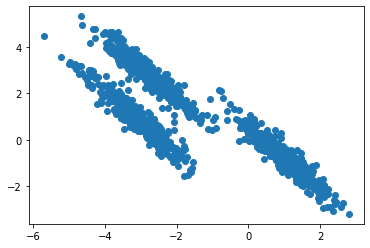

In [285]:
x = np.array(dataSet4)[:, 0]    # x-coordinates of data points
y = np.array(dataSet4)[:, 1]    # y-coordinates of data points
plt.scatter(x, y)               # Plotting just to visually identify the number of clusters

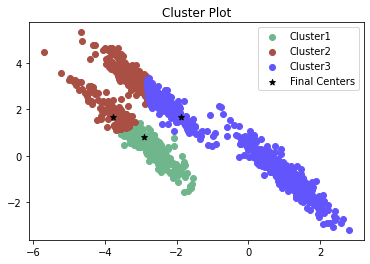

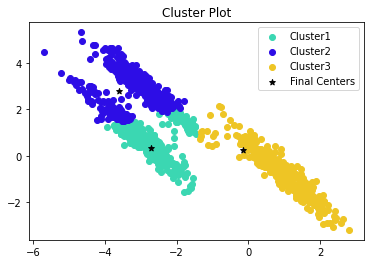

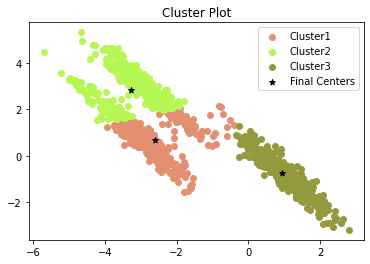

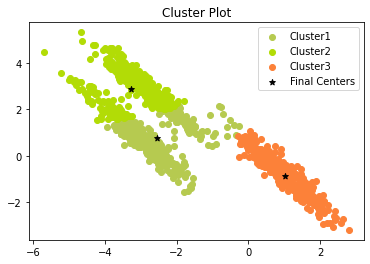

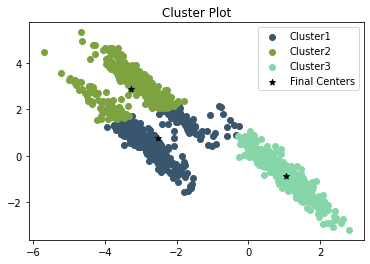

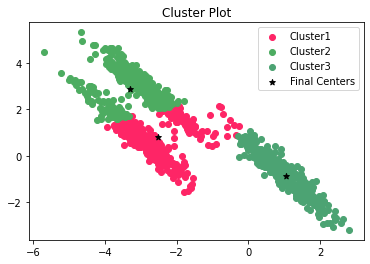

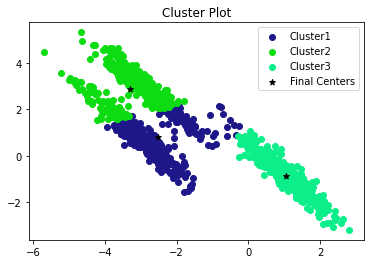

In [286]:
# Q4 -> a)

k = 3   # The value of k identified is 3

# Performing k-means on above dataSet with k value identified
[clusterCentroids, clusterLabel, sse] = kMeans(dataSet4, k, [], [True, 2, []])

# No, I didn't obtain the expected clusters. The reason for this is:
# First of all, the algorithm depends highly on initial choice of centroids. It always tries to make some kind of spherical
# shape around the centroids, so if clusters have some random different complex shapes it won't yeild good results
# It doesn't let data points that are far away from each other share the same cluster even if they belong to same
# clusters. It only tries to minimize the distance within the cluster. Centroids are dragged by the outliers which
# don't belong to same cluster but are nearer to center than the points within the cluster. It only takes into
# consideration the Euclidean distance.

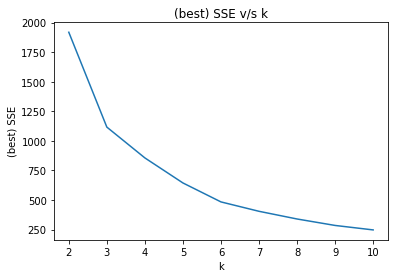

In [287]:
# Q4 -> b)

# results = []      # Results obtained which containes best SSE values for different k values
# count = 100       # The number of tests performed for each value of k
# for k in range(11):
#     if (k >= 2):  # Finding results for k = 2 to 10
#         [clusterCentroids, clusterLabel, sse] = kMeans(dataSet4, k)   # To get initial SSE for reference
#         ans = sse             # The best SSE value for corresponding k
#         for i in range(count):
#             [clusterCentroids, clusterLabel, sse] = kMeans(dataSet4, k)
#             if (sse < ans):   # update if sse found is better
#                 ans = sse
#         results.append(ans)   # Adding it to the result
# print(results)

# The following results were obtained using the above commented code
# SSE values for k = 2 to 10 when count = 10 (Execution Time: aroung 5mins)
# results = [1918.4684234595625, 1116.2193177711727, 855.5386718092027, 643.7659440279698, 483.41250459886345, 403.99020938546806, 339.04433823197047, 284.13189272421334, 247.81854127435926]

# SSE values for k = 2 to 10 when count = 100 (Execution Time: around 20mins)
results = [1918.4684234595625, 1116.2193177711727, 855.5386718092027, 643.7659440279695, 483.41250459886226, 403.9902093854676, 338.95658079846754, 284.37839149265744, 246.5780807509515]

x = [2, 3, 4, 5, 6, 7, 8, 9, 10]    # k-values for the plot as x-coordinates
y = results                         # best SSE values for corresponding k's as y-coordinates
# Plotting the plot of best SSE v/s K
plt.plot(x, y)
plt.title("(best) SSE v/s k")
plt.xlabel("k")
plt.ylabel("(best) SSE")
plt.draw()
plt.show()

# From the below plot, we will take the value of k after which the SSE starts decreasing in a linear fashion.
# Because after this point the decreasing value is not worth it. Obviously, picking a larger value of k will 
# increase the accuracy, but that accuracy is not much increased and also picking a larger value also increases
# the time for which k-means algorithm will execute. Also taking a larger value of k may result in more number 
# of clusters than the actual groups in which the original data is divided.
#
# Hence, the value of k picked is 6